# unsafe.Pointer usage survey



In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

import json
from datetime import datetime

In [2]:
def save_figure(path):
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })
    plt.savefig(path)
    matplotlib.use("module://ipykernel.pylab.backend_inline")

In [3]:
MATCH_TYPES = (
    'unsafe.Pointer', 'unsafe.Sizeof', 'unsafe.Alignof', 'unsafe.Offsetof',
    'uintptr', 'reflect.SliceHeader', 'reflect.StringHeader'
)

Analysedauer der verschiedenen Analysen:

 - Download: ca. 4h
 - Grep: ca. 15min
 - Vet: ca. 2h 51min
 - Gosec: ca. 24h
 - AST: ca. 1h
 - Linter: ca. 3h 30min

## Analyse von Projektdaten

In [4]:
projects_df = pd.read_csv('/root/data/projects.csv',
                         parse_dates=['project_created_at', 'project_last_pushed_at', 'project_updated_at'])

In [5]:
projects_df.head()

,project_name,project_rank,project_github_clone_url,project_number_of_stars,project_number_of_forks,project_github_id,project_revision,project_created_at,project_last_pushed_at,project_updated_at,project_size,project_checkout_path
0,golang/go,1,https://github.com/golang/go.git,72988,10460,23096959,6bf2eea62a3425c57f3d908ec32047a9ae41c025,2014-08-19 04:33:40+00:00,2020-05-28 14:45:33+00:00,2020-05-28 18:49:53+00:00,215283,/root/download/golang/go
1,kubernetes/kubernetes,2,https://github.com/kubernetes/kubernetes.git,66512,23806,20580498,fb9e1946b0af89998b3e366d49399f6365c94c56,2014-06-06 22:56:04+00:00,2020-05-28 19:09:23+00:00,2020-05-28 18:55:28+00:00,918555,/root/download/kubernetes/kubernetes
2,moby/moby,3,https://github.com/moby/moby.git,57189,16540,7691631,763f9e799b7ad2b10e089d546f5a6575ce70f418,2013-01-18 18:10:57+00:00,2020-05-28 18:55:57+00:00,2020-05-28 18:37:46+00:00,153636,/root/download/moby/moby
3,avelino/awesome-go,4,https://github.com/avelino/awesome-go.git,54733,7267,21540759,3e27d63fe21f95dc41a62dda9b78b2500dc9e0c0,2014-07-06 13:42:15+00:00,2020-05-28 00:00:53+00:00,2020-05-28 18:26:27+00:00,8342,/root/download/avelino/awesome-go
4,gohugoio/hugo,5,https://github.com/gohugoio/hugo.git,44317,5049,11180687,6a3e89743ccad58097a6dd203a63448946a2304d,2013-07-04 15:26:26+00:00,2020-05-28 17:46:37+00:00,2020-05-28 19:11:19+00:00,88480,/root/download/gohugoio/hugo


## Analyse von Grep Daten

In [6]:
grep_df = pd.read_csv('/root/data/lexical/grep_findings_0_499.csv')

In [7]:
grep_df

,text,context,line_number,column,absolute_offset,match_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,file_copy_path
0,var CacheLineSize uintptr = CacheLinePadSize\n,\n// CacheLineSize is the CPU's assumed cache ...,20,18,769,uintptr,cpu.go,7184,245,internal/cpu,std,std,kubernetes/kubernetes,internal/cpu/cpu.go
1,\toffsetX86HasSSE2 = unsafe.Offsetof(cpu.X86...,)\n\n// Offsets into internal/cpu records for ...,14,22,281,unsafe.Offsetof,bytealg.go,664,23,internal/bytealg,std,std,kubernetes/kubernetes,internal/bytealg/bytealg.go
2,\toffsetX86HasSSE42 = unsafe.Offsetof(cpu.X86...,\n// Offsets into internal/cpu records for use...,15,22,336,unsafe.Offsetof,bytealg.go,664,23,internal/bytealg,std,std,kubernetes/kubernetes,internal/bytealg/bytealg.go
3,\toffsetX86HasAVX2 = unsafe.Offsetof(cpu.X86...,// Offsets into internal/cpu records for use i...,16,22,392,unsafe.Offsetof,bytealg.go,664,23,internal/bytealg,std,std,kubernetes/kubernetes,internal/bytealg/bytealg.go
4,\toffsetX86HasPOPCNT = unsafe.Offsetof(cpu.X86...,const (\n\toffsetX86HasSSE2 = unsafe.Offseto...,17,22,447,unsafe.Offsetof,bytealg.go,664,23,internal/bytealg,std,std,kubernetes/kubernetes,internal/bytealg/bytealg.go
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850135,"\t_, _, e1 := Syscall6(SYS_KEXEC_FILE_LOAD, ui...","\t_p0, err = BytePtrFromString(cmdline)\n\tif ...",2462,62,60820,uintptr,zsyscall_linux_amd64.go,61019,2467,golang.org/x/sys/unix,golang.org/x/sys,v0.0.0-20191010194322-b09406accb47,gwuhaolin/livego,golang.org/x/sys/unix/zsyscall_linux_amd64.go
2850136,"\t_, _, e1 := Syscall6(SYS_KEXEC_FILE_LOAD, ui...","\t_p0, err = BytePtrFromString(cmdline)\n\tif ...",2462,81,60820,uintptr,zsyscall_linux_amd64.go,61019,2467,golang.org/x/sys/unix,golang.org/x/sys,v0.0.0-20191010194322-b09406accb47,gwuhaolin/livego,golang.org/x/sys/unix/zsyscall_linux_amd64.go
2850137,"\t_, _, e1 := Syscall6(SYS_KEXEC_FILE_LOAD, ui...","\t_p0, err = BytePtrFromString(cmdline)\n\tif ...",2462,102,60820,uintptr,zsyscall_linux_amd64.go,61019,2467,golang.org/x/sys/unix,golang.org/x/sys,v0.0.0-20191010194322-b09406accb47,gwuhaolin/livego,golang.org/x/sys/unix/zsyscall_linux_amd64.go
2850138,"\t_, _, e1 := Syscall6(SYS_KEXEC_FILE_LOAD, ui...","\t_p0, err = BytePtrFromString(cmdline)\n\tif ...",2462,110,60820,unsafe.Pointer,zsyscall_linux_amd64.go,61019,2467,golang.org/x/sys/unix,golang.org/x/sys,v0.0.0-20191010194322-b09406accb47,gwuhaolin/livego,golang.org/x/sys/unix/zsyscall_linux_amd64.go


In [8]:
# 10 examples of an unsafe.Pointer match

print("\n\n".join([s.strip() for s in list(grep_df['text'][:10])]))

var CacheLineSize uintptr = CacheLinePadSize

offsetX86HasSSE2   = unsafe.Offsetof(cpu.X86.HasSSE2)

offsetX86HasSSE42  = unsafe.Offsetof(cpu.X86.HasSSE42)

offsetX86HasAVX2   = unsafe.Offsetof(cpu.X86.HasAVX2)

offsetX86HasPOPCNT = unsafe.Offsetof(cpu.X86.HasPOPCNT)

offsetS390xHasVX = unsafe.Offsetof(cpu.S390X.HasVX)

func abigen_runtime_memequal(a, b unsafe.Pointer, size uintptr) bool

func abigen_runtime_memequal(a, b unsafe.Pointer, size uintptr) bool

func abigen_runtime_memequal_varlen(a, b unsafe.Pointer) bool

func Loadp(ptr unsafe.Pointer) unsafe.Pointer {


In [9]:
# 1 example of a match context

print(grep_df['context'][0])


// CacheLineSize is the CPU's assumed cache line size.
// There is currently no runtime detection of the real cache line size
// so we use the constant per GOARCH CacheLinePadSize as an approximation.
var CacheLineSize uintptr = CacheLinePadSize

var X86 x86

// The booleans in x86 contain the correspondingly named cpuid feature bit.
// HasAVX and HasAVX2 are only set if the OS does support XMM and YMM registers



## Analyse von Package Daten

In [10]:
package_df = pd.read_csv('/root/data/packages_0_499.csv')

In [11]:
package_df

,name,import_path,dir,is_standard,is_dep_only,number_of_go_files,loc,byte_size,module_path,module_version,module_registry,module_is_indirect,project_name
0,gci,k8s.io/kubernetes/cluster/gce/gci,/root/download/kubernetes/kubernetes/cluster/g...,False,False,0,0,0,k8s.io/kubernetes,NaN,k8s.io,False,kubernetes/kubernetes
1,cpu,internal/cpu,/usr/local/go/src/internal/cpu,True,True,3,357,10131,std,std,std,False,kubernetes/kubernetes
2,unsafe,unsafe,/usr/local/go/src/unsafe,True,True,1,205,9215,std,std,std,False,kubernetes/kubernetes
3,bytealg,internal/bytealg,/usr/local/go/src/internal/bytealg,True,True,8,172,4841,std,std,std,False,kubernetes/kubernetes
4,atomic,runtime/internal/atomic,/usr/local/go/src/runtime/internal/atomic,True,True,2,127,2571,std,std,std,False,kubernetes/kubernetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154098,parser,github.com/gwuhaolin/livego/parser,/root/download/gwuhaolin/livego/parser,False,False,1,69,1412,github.com/gwuhaolin/livego,NaN,github.com,False,gwuhaolin/livego
154099,hls,github.com/gwuhaolin/livego/protocol/hls,/root/download/gwuhaolin/livego/protocol/hls,False,False,7,659,14330,github.com/gwuhaolin/livego,NaN,github.com,False,gwuhaolin/livego
154100,httpflv,github.com/gwuhaolin/livego/protocol/httpflv,/root/download/gwuhaolin/livego/protocol/httpflv,False,False,2,317,7121,github.com/gwuhaolin/livego,NaN,github.com,False,gwuhaolin/livego
154101,main,github.com/gwuhaolin/livego,/root/download/gwuhaolin/livego,False,False,1,143,3029,github.com/gwuhaolin/livego,NaN,github.com,False,gwuhaolin/livego


## Analyse von Go Vet Daten

In [12]:
vet_df = pd.read_csv('/root/data/lexical/vet_findings_0_499.csv')

In [13]:
vet_df.dtypes

message                object
context                object
line_number             int64
column                  int64
raw_output             object
file_name              object
file_loc                int64
file_byte_size          int64
package_import_path    object
module_path            object
module_version         object
project_name           object
file_copy_path         object
dtype: object

In [14]:
vet_df

,message,context,line_number,column,raw_output,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,file_copy_path
0,possible misuse of unsafe.Pointer,"\t\t\tif !CompareAndSwapPointer(&vp.typ, nil, ...",59,44,/usr/local/go/src/sync/atomic/value.go:59:44: ...,value.go,86,2446,sync/atomic,std,std,kubernetes/kubernetes,sync/atomic/value.go
1,possible misuse of unsafe.Pointer,\treturn unsafe.Pointer(x ^ 0),287,9,/root/go/pkg/mod/github.com/modern-go/reflect2...,reflect2.go,298,7272,github.com/modern-go/reflect2,github.com/modern-go/reflect2,v1.0.1,kubernetes/kubernetes,github.com/modern-go/reflect2/reflect2.go
2,unreachable code,\treturn nil,262,2,/root/go/pkg/mod/google.golang.org/protobuf@v1...,decode.go,789,21031,google.golang.org/protobuf/encoding/prototext,google.golang.org/protobuf,v1.23.0,kubernetes/kubernetes,google.golang.org/protobuf/encoding/prototext/...
3,possible misuse of unsafe.Pointer,\tsize := *(*uintptr)(unsafe.Pointer(ptr + uns...,56,22,/usr/local/go/src/runtime/alg.go:56:22: possib...,alg.go,389,10428,runtime,std,std,kubernetes/kubernetes,runtime/alg.go
4,possible misuse of unsafe.Pointer,\told := unsafe.Pointer(sync_atomic_SwapUintpt...,63,9,/usr/local/go/src/runtime/atomic_pointer.go:63...,atomic_pointer.go,77,2683,runtime,std,std,kubernetes/kubernetes,runtime/atomic_pointer.go
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120411,possible misuse of unsafe.Pointer,\t\t\tinfo.verdef = (*elfVerdef)(unsafe.Pointe...,153,31,/usr/local/go/src/runtime/vdso_linux.go:153:31...,vdso_linux.go,293,7866,runtime,std,std,gwuhaolin/livego,runtime/vdso_linux.go
120412,possible misuse of unsafe.Pointer,"\t\tvdsoInitFromSysinfoEhdr(info1, (*elfEhdr)(...",278,45,/usr/local/go/src/runtime/vdso_linux.go:278:45...,vdso_linux.go,293,7866,runtime,std,std,gwuhaolin/livego,runtime/vdso_linux.go
120413,unreachable code,"\treturn s, nil",770,2,/root/go/pkg/mod/github.com/magiconair/propert...,properties.go,833,22854,github.com/magiconair/properties,github.com/magiconair/properties,v1.8.1,gwuhaolin/livego,github.com/magiconair/properties/properties.go
120414,unreachable code,\treturn nil,332,2,protocol/rtmp/rtmp.go:332:2: unreachable code,rotocol/rtmp/rtmp.go,0,0,unknown-vet-error,NaN,NaN,NaN,unknown-vet-error/rotocol/rtmp/rtmp.go


## Analyse von Gosec Daten

In [15]:
gosec_df = pd.read_csv('/root/data/lexical/gosec_findings_0_499.csv')

In [16]:
gosec_df

,message,context,confidence,severity,cwe_id,rule_id,line_number,column,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,file_copy_path
0,Use of weak random number generator (math/rand...,rand.Int(),MEDIUM,HIGH,338.0,G404,392,43,pd.go,654,26896,k8s.io/kubernetes/test/e2e/storage,k8s.io/kubernetes,NaN,kubernetes/kubernetes,k8s.io/kubernetes/test/e2e/storage/pd.go
1,Use of weak random number generator (math/rand...,rand.Int(),MEDIUM,HIGH,338.0,G404,50,14,dnsclient_unix.go,790,22389,net,std,std,kubernetes/kubernetes,net/dnsclient_unix.go
2,Potential hardcoded credentials,"repeatedStringForImagePullSecrets := ""[]LocalO...",LOW,HIGH,798.0,G101,25719,2,generated.pb.go,66564,1655160,k8s.io/api/core/v1,k8s.io/api,v0.0.0,kubernetes/kubernetes,k8s.io/api/core/v1/generated.pb.go
3,Potential hardcoded credentials,"repeatedStringForSecrets := ""[]ObjectReference{""",LOW,HIGH,798.0,G101,26498,2,generated.pb.go,66564,1655160,k8s.io/api/core/v1,k8s.io/api,v0.0.0,kubernetes/kubernetes,k8s.io/api/core/v1/generated.pb.go
4,Potential hardcoded credentials,"secretVal = ""086a7ffc-0225-11e8...",LOW,HIGH,798.0,G101,49,2,transformation_testcase.go,262,8293,k8s.io/kubernetes/test/integration/master,k8s.io/kubernetes,NaN,kubernetes/kubernetes,k8s.io/kubernetes/test/integration/master/tran...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124160,Use of unsafe calls should be audited,unsafe.Pointer(&s),HIGH,LOW,242.0,G103,94,31,root/go/pkg/mod/github.com/mattn/go-sqlite3@v2...,0,0,unknown-vet-error,NaN,NaN,NaN,unknown-vet-error/root/go/pkg/mod/github.com/m...
124161,Use of unsafe calls should be audited,unsafe.Pointer(h.Data),HIGH,LOW,242.0,G103,95,21,root/go/pkg/mod/github.com/mattn/go-sqlite3@v2...,0,0,unknown-vet-error,NaN,NaN,NaN,unknown-vet-error/root/go/pkg/mod/github.com/m...
124162,Use of unsafe calls should be audited,unsafe.Pointer(cext),HIGH,LOW,242.0,G103,32,16,root/go/pkg/mod/github.com/mattn/go-sqlite3@v2...,0,0,unknown-vet-error,NaN,NaN,NaN,unknown-vet-error/root/go/pkg/mod/github.com/m...
124163,Use of unsafe calls should be audited,unsafe.Pointer(clib),HIGH,LOW,242.0,G103,55,15,root/go/pkg/mod/github.com/mattn/go-sqlite3@v2...,0,0,unknown-vet-error,NaN,NaN,NaN,unknown-vet-error/root/go/pkg/mod/github.com/m...


# Auswertungen

## Wie viele Datenpunkte sind vorhanden?

In [17]:
print("Anzahl Projekte (Metadaten): {:,}".format(projects_df['project_name'].count()))
print("Anzahl Projekte (analysiert): {:,}".format(package_df['project_name'].nunique()))
print("Anzahl analysierter Packages: {:,}".format(package_df['import_path'].nunique()))
print("Anzahl analysierter Module: {:,}".format(package_df['module_path'].nunique()))
print("Anzahl Datenpunkte Grep: {:,}".format(grep_df['text'].count()))
print("Anzahl Datenpunkte Vet: {:,}".format(vet_df['line_number'].count()))
print("Anzahl Datenpunkte Gosec: {:,}".format(gosec_df['line_number'].count()))

Anzahl Projekte (Metadaten): 500
Anzahl Projekte (analysiert): 495
Anzahl analysierter Packages: 40,845
Anzahl analysierter Module: 3,202
Anzahl Datenpunkte Grep: 2,850,140
Anzahl Datenpunkte Vet: 120,416
Anzahl Datenpunkte Gosec: 124,165


In [18]:
print("Anzahl tatsächlich verschiedener Zeilen mit unsafe usages: {:,}".format(grep_df['text'].nunique()))

Anzahl tatsächlich verschiedener Zeilen mit unsafe usages: 13,808


## Anzahl von unsafe usages nach Projekt

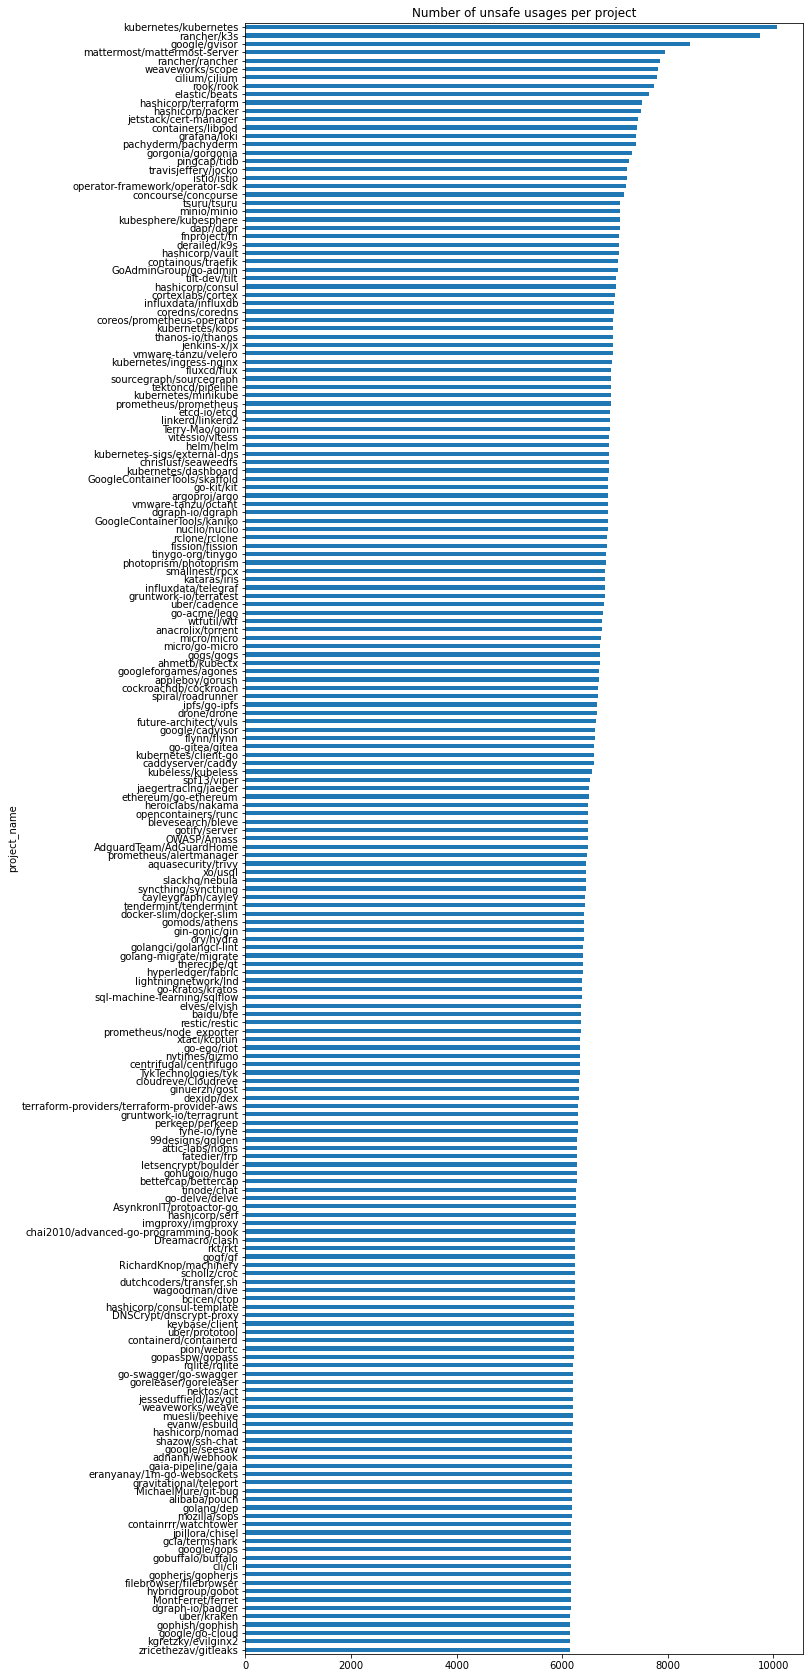

In [19]:
grep_df\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=True)[300:]\
    .plot.barh(title='Number of unsafe.Pointer usages per project', figsize=(10, 30))

## Anzahl von unsafe usages nach Modul

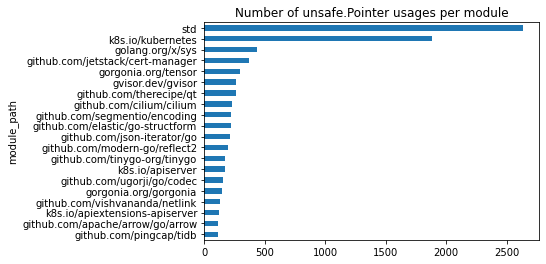

In [20]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .groupby(['module_path', 'project_name'])['module_path'].count()\
    .groupby('module_path').max()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Number of unsafe.Pointer usages per module')

In [21]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .groupby(['module_path', 'project_name'])['module_path'].count()\
    .groupby('module_path').max()\
    .sort_values(ascending=False)[:15]

module_path
std                                 2636
k8s.io/kubernetes                   1885
golang.org/x/sys                     440
github.com/jetstack/cert-manager     374
gorgonia.org/tensor                  299
gvisor.dev/gvisor                    263
github.com/therecipe/qt              263
github.com/cilium/cilium             232
github.com/segmentio/encoding        225
github.com/elastic/go-structform     220
github.com/json-iterator/go          213
github.com/modern-go/reflect2        194
github.com/tinygo-org/tinygo         172
k8s.io/apiserver                     168
github.com/ugorji/go/codec           157
Name: module_path, dtype: int64

Wir sehen einen unglaublich großen Vorsprung der Standardlibrary mit ihren Packages. Danach scheint kubernetes einen vergleichsweise extremen Vorsprung zu haben, und das "gefährlichste" Module ist `sys`.

## Anzahl von unsafe Usages nach Package

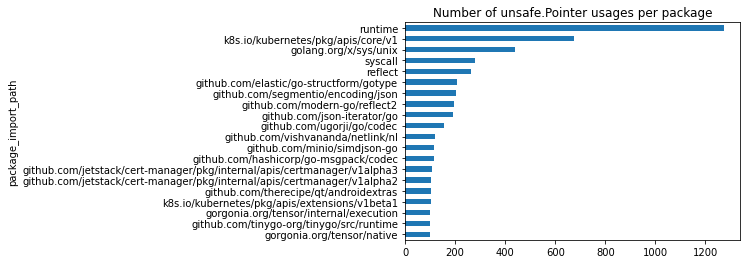

In [22]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .groupby(['package_import_path', 'project_name'])['package_import_path'].count()\
    .groupby('package_import_path').max()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Number of unsafe.Pointer usages per package')

## Anzahl von unsafe.Pointer usages pro Registry

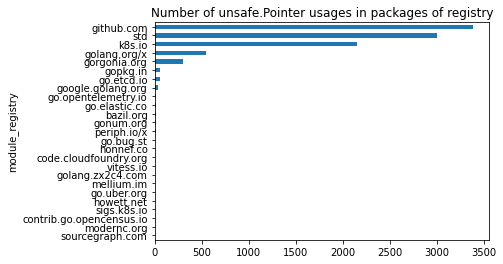

In [23]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .dropna()

df2 = package_df

mdf = pd.merge(df1, df2, how='left', 
         left_on=['project_name', 'package_import_path', 'module_path', 'module_version'], 
         right_on=['project_name', 'import_path', 'module_path', 'module_version'])

mdf\
    .groupby(['module_registry', 'package_import_path', 'project_name'])['module_registry'].count()\
    .groupby(['module_registry', 'package_import_path']).max()\
    .groupby('module_registry').sum()\
    .sort_values(ascending=True)\
    .plot.barh(title='Number of unsafe.Pointer usages in packages of registry')

In [24]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .dropna()

df2 = package_df

mdf = pd.merge(df1, df2, how='left', 
         left_on=['project_name', 'package_import_path', 'module_path', 'module_version'], 
         right_on=['project_name', 'import_path', 'module_path', 'module_version'])

mdf\
    .groupby(['module_registry', 'package_import_path', 'project_name'])['module_registry'].count()\
    .groupby(['module_registry', 'package_import_path']).max()\
    .groupby('module_registry').sum()\
    .sort_values(ascending=False)

module_registry
github.com                  3389
std                         3002
k8s.io                      2151
golang.org/x                 550
gorgonia.org                 299
gopkg.in                      61
go.etcd.io                    56
google.golang.org             41
go.opentelemetry.io           19
go.elastic.co                 13
bazil.org                     12
gonum.org                     10
periph.io/x                   10
go.bug.st                      8
honnef.co                      7
code.cloudfoundry.org          7
vitess.io                      7
golang.zx2c4.com               6
mellium.im                     6
go.uber.org                    3
howett.net                     2
sigs.k8s.io                    2
contrib.go.opencensus.io       2
modernc.org                    1
sourcegraph.com                1
Name: module_registry, dtype: int64

Wir sehen, dass die meisten unsafe usages in `github.com` zu finden sind, sogar noch mehr als in der Standardbibliothek. Das wird aber vermutlich einfach dadurch erzeugt, dass in dieser Registry auch die meisten Packages zu finden sind:

## Anzahl Packages pro Registry

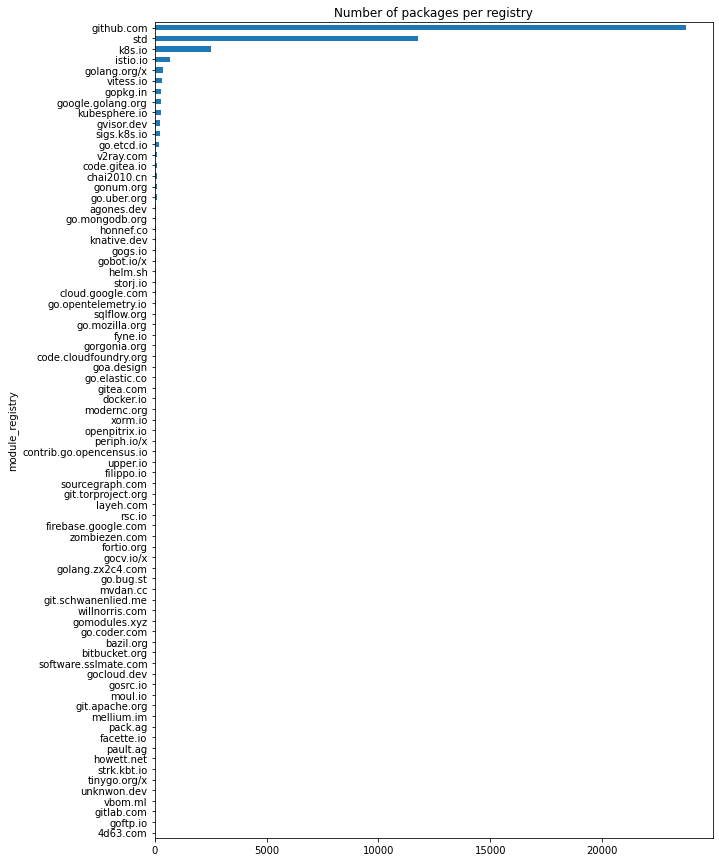

In [25]:
package_df\
    .groupby('module_registry')['import_path'].nunique()\
    .sort_values(ascending=True)\
    .plot.barh(title='Number of packages per registry', figsize=(10,15))

In [26]:
package_df\
    .groupby('module_registry')['import_path'].nunique()\
    .sort_values(ascending=False)

module_registry
github.com      23743
std             11758
k8s.io           2535
istio.io          686
golang.org/x      388
                ...  
unknwon.dev         1
vbom.ml             1
gitlab.com          1
goftp.io            1
4d63.com            1
Name: import_path, Length: 77, dtype: int64

## Unterschiedliche Anzahl von unsafe.Pointer usages im gleichen Modul

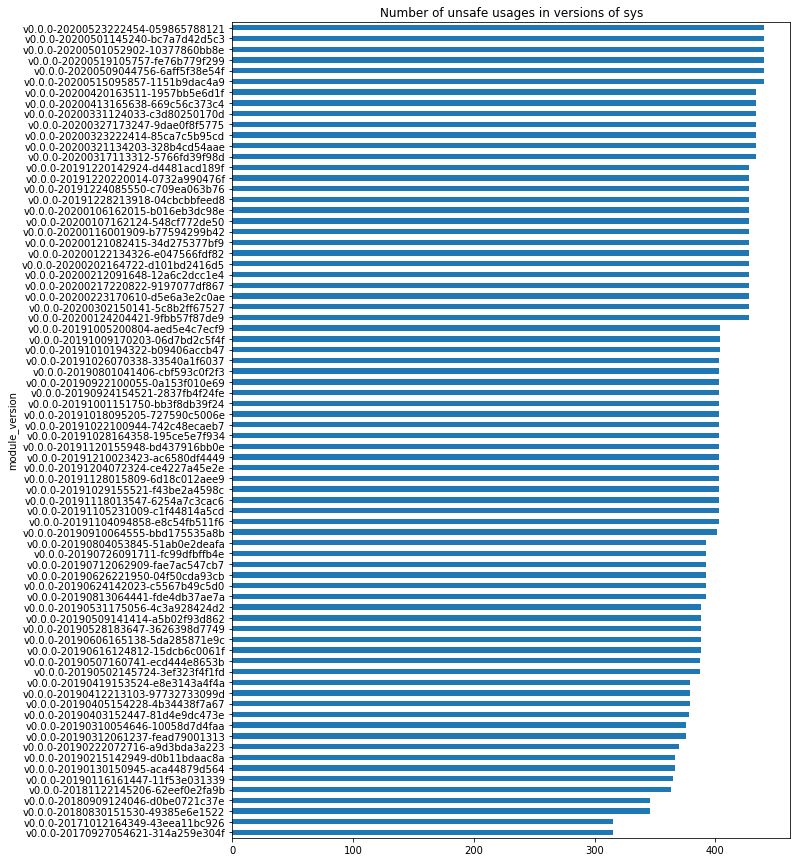

In [27]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .where(grep_df['module_path']=='golang.org/x/sys')\
    .groupby(['module_version', 'project_name'])['module_version'].count()\
    .groupby('module_version').max()\
    .sort_values(ascending=True)\
    .plot.barh(title='Number of unsafe usages in versions of sys', figsize=(10,15))

In [28]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .where(grep_df['module_path']=='golang.org/x/sys')\
    .groupby(['module_version', 'project_name'])['module_version'].count()\
    .groupby('module_version').max()\
    .sort_values(ascending=False)

module_version
v0.0.0-20200523222454-059865788121    440
v0.0.0-20200501145240-bc7a7d42d5c3    440
v0.0.0-20200501052902-10377860bb8e    440
v0.0.0-20200519105757-fe76b779f299    440
v0.0.0-20200509044756-6aff5f38e54f    440
                                     ... 
v0.0.0-20181122145206-62eef0e2fa9b    363
v0.0.0-20180909124046-d0be0721c37e    346
v0.0.0-20180830151530-49385e6e1522    346
v0.0.0-20171012164349-43eea11bc926    315
v0.0.0-20170927054621-314a259e304f    315
Name: module_version, Length: 76, dtype: int64

Wir sehen, dass die verschiedenen Versionen zwischen 300 und 400 Usages haben. **Die Anzahl nimmt über die Zeit zu, die wenigsten Usages haben die Versionen von 2017, ganz oben stehen Versionen von 2020.**

Es ist schwierig einen Changelog für das Modul zu finden (es gibt keinen), man kann sich nur die Commits anschauen. Von der zweitneusten Version (59c9f1ba88fa) zur neusten (669c56c373c4) wird z.B. der Syscall `openat2` entfernt, der vorher hinzugekommen ist.

https://github.com/golang/sys/compare/59c9f1b...669c56c

Zwischen 8dbc5d05d6ed und 49385e6e1522 (+26 Vorkommnisse) sind einige nicht-syscall-bezogene Änderungen durchgeführt worden, aber aus den Commits ist nicht direkt ersichtlich was genau dort nun hinzugefügt wurde.

https://github.com/golang/sys/compare/8dbc5d05d6ed...49385e6e1522

## Anzahl von unsafe.Pointer usages pro Datei

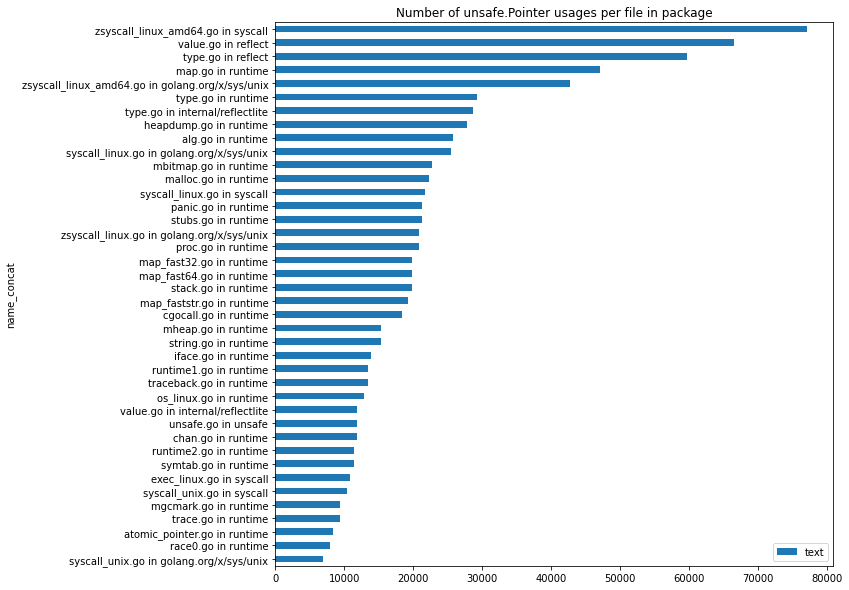

In [29]:
df = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .groupby(['file_name', 'package_import_path'], as_index=False)\
    ['text'].count()

df['name_concat'] = df.apply(lambda x: "{} in {}"\
                             .format(x['file_name'], x['package_import_path']), \
                             axis=1)

df\
    .iloc[:,[3,2]]\
    .sort_values(by='text', ascending=True)[-40:]\
    .plot.barh(x='name_concat', title='Number of unsafe.Pointer usages per file in package', figsize=(10,10))

Der Plot ist durch die Standardbibliothek verzerrt, daher hier die Analyse ohne `std`:

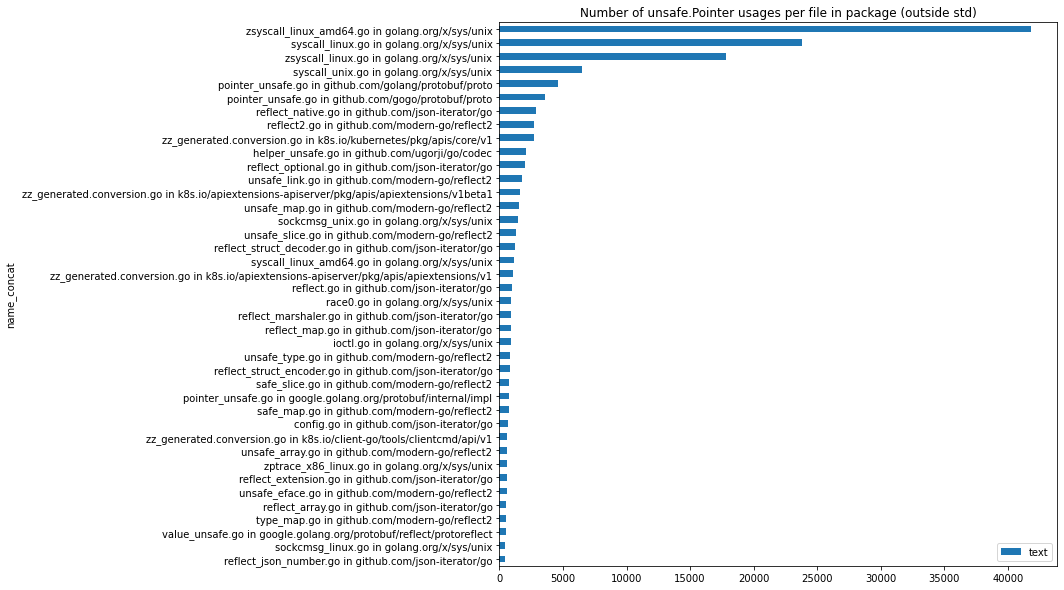

In [30]:
df = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .where(grep_df['module_path']!='std')\
    .groupby(['file_name', 'package_import_path'], as_index=False)\
    ['text'].count()

df['name_concat'] = df.apply(lambda x: "{} in {}"\
                             .format(x['file_name'], x['package_import_path']), \
                             axis=1)

df\
    .iloc[:,[3,2]]\
    .sort_values(by='text', ascending=True)[-40:]\
    .plot.barh(x='name_concat', title='Number of unsafe.Pointer usages per file in package (outside std)', figsize=(10,10))

In [31]:
df = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .where(grep_df['module_path']!='std')\
    .groupby(['file_name', 'package_import_path'], as_index=False)\
    ['text'].count()

df['name_concat'] = df.apply(lambda x: "{} in {}"\
                             .format(x['file_name'], x['package_import_path']), \
                             axis=1)

df\
    .iloc[:,[3,2]]\
    .sort_values(by='text', ascending=False)[:-20]

,name_concat,text
1043,zsyscall_linux_amd64.go in golang.org/x/sys/unix,41820
838,syscall_linux.go in golang.org/x/sys/unix,23787
1042,zsyscall_linux.go in golang.org/x/sys/unix,17829
840,syscall_unix.go in golang.org/x/sys/unix,6460
630,pointer_unsafe.go in github.com/golang/protobu...,4625
...,...,...
489,lz4.go in github.com/pierrec/lz4,1
913,types.go in gorgonia.org/tensor,1
483,logview.go in github.com/henrylee2cn/pholcus/gui,1
482,logging_linux.go in github.com/evanw/esbuild/i...,1


## Wie oft werden Module importiert? (Beliebtheit)

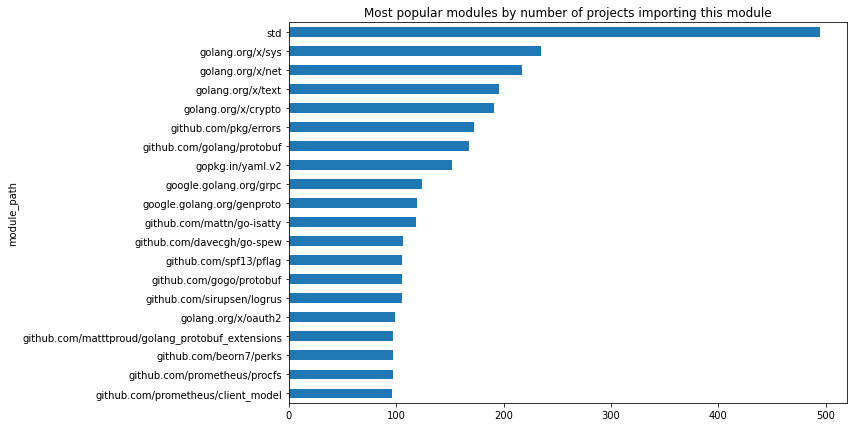

In [32]:
package_df\
    .groupby(['module_path'])['project_name'].nunique()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Most popular modules by number of projects importing this module', figsize=(10,7))

In [33]:
package_df\
    .groupby(['module_path'])['project_name'].nunique()\
    .sort_values(ascending=False)[:20]

module_path
std                                                 495
golang.org/x/sys                                    235
golang.org/x/net                                    217
golang.org/x/text                                   196
golang.org/x/crypto                                 191
github.com/pkg/errors                               172
github.com/golang/protobuf                          168
gopkg.in/yaml.v2                                    152
google.golang.org/grpc                              124
google.golang.org/genproto                          119
github.com/mattn/go-isatty                          118
github.com/davecgh/go-spew                          106
github.com/spf13/pflag                              105
github.com/gogo/protobuf                            105
github.com/sirupsen/logrus                          105
golang.org/x/oauth2                                  99
github.com/matttproud/golang_protobuf_extensions     97
github.com/beorn7/perks             

## Wie viele Module importieren die Projekte jeweils?

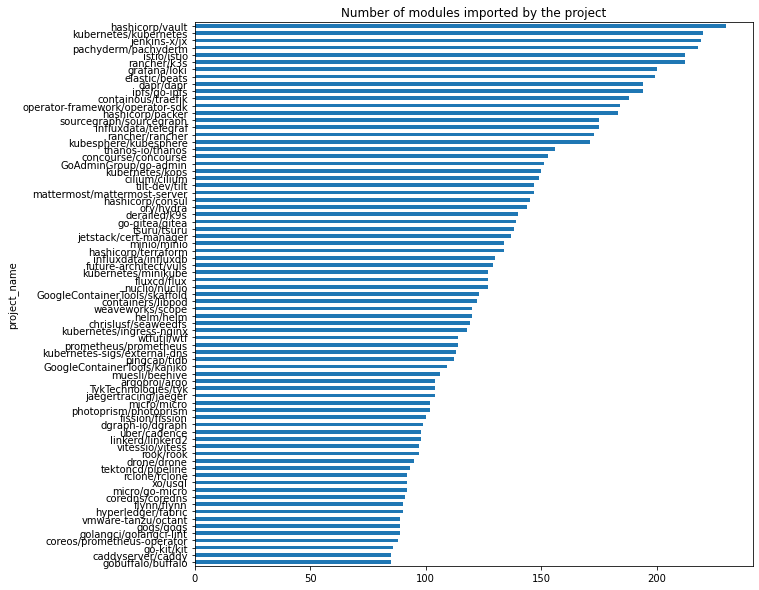

In [34]:
package_df\
    .groupby('project_name')['module_path'].nunique()\
    .sort_values(ascending=True)[-75:]\
    .plot.barh(title='Number of modules imported by the project', figsize=(10,10))

In [35]:
package_df\
    .groupby('project_name')['module_path'].nunique()\
    .sort_values(ascending=False)

project_name
hashicorp/vault          230
kubernetes/kubernetes    220
jenkins-x/jx             219
pachyderm/pachyderm      218
istio/istio              212
                        ... 
docker/classicswarm        1
sosedoff/pgweb             1
dgrijalva/jwt-go           1
nsf/termbox-go             1
coyove/goflyway            1
Name: module_path, Length: 495, dtype: int64

## Wie viele Packages importieren die Projekte jeweils?

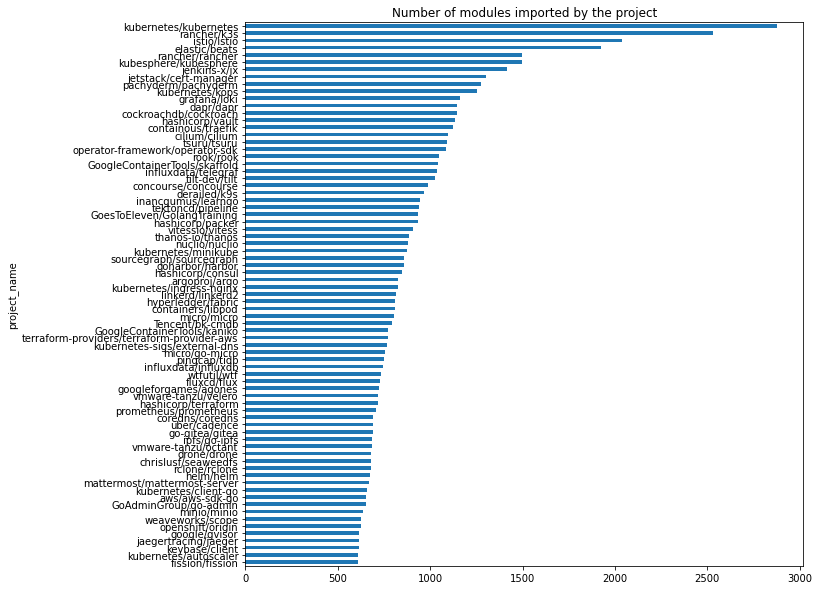

In [36]:
package_df\
    .groupby('project_name')['import_path'].nunique()\
    .sort_values(ascending=True)[-75:]\
    .plot.barh(title='Number of modules imported by the project', figsize=(10,10))

In [37]:
package_df\
    .groupby('project_name')['import_path'].nunique()\
    .sort_values(ascending=False)

project_name
kubernetes/kubernetes                 2877
rancher/k3s                           2532
istio/istio                           2037
elastic/beats                         1925
rancher/rancher                       1499
                                      ... 
tmrts/go-patterns                       32
unknwon/go-fundamental-programming      31
astaxie/go-best-practice                31
andlabs/ui                              28
jroimartin/gocui                        22
Name: import_path, Length: 495, dtype: int64

## Welche Module haben die meisten Packages?

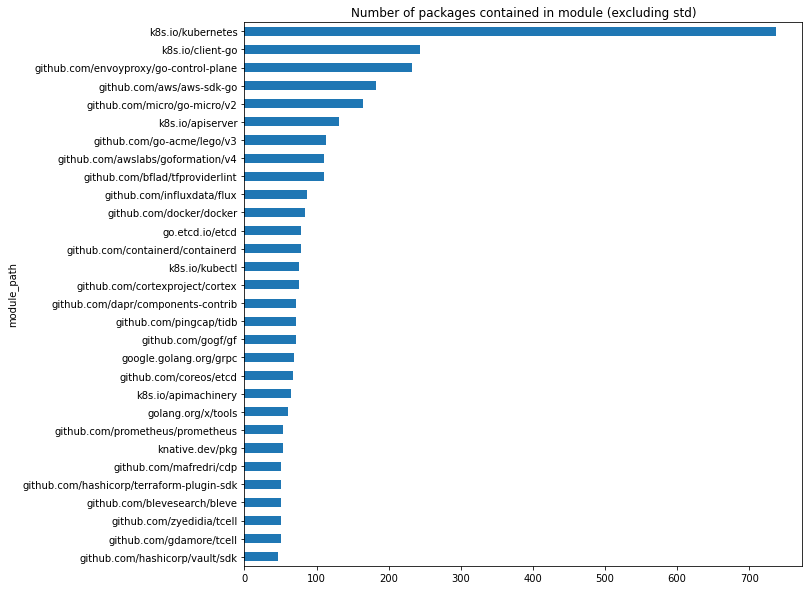

In [38]:
package_df\
    .where(package_df['module_path']!='std')\
    .groupby(['module_path', 'module_version'])['import_path'].nunique()\
    .groupby('module_path').max()\
    .sort_values(ascending=True)[-30:]\
    .plot.barh(title='Number of packages contained in module (excluding std)', figsize=(10,10))

In [39]:
package_df\
    .where(package_df['module_path']!='std')\
    .groupby(['module_path', 'module_version'])['import_path'].nunique()\
    .groupby('module_path').max()\
    .sort_values(ascending=False)[:30]

module_path
k8s.io/kubernetes                            737
k8s.io/client-go                             244
github.com/envoyproxy/go-control-plane       233
github.com/aws/aws-sdk-go                    183
github.com/micro/go-micro/v2                 164
k8s.io/apiserver                             131
github.com/go-acme/lego/v3                   113
github.com/awslabs/goformation/v4            110
github.com/bflad/tfproviderlint              110
github.com/influxdata/flux                    87
github.com/docker/docker                      84
go.etcd.io/etcd                               79
github.com/containerd/containerd              78
k8s.io/kubectl                                76
github.com/cortexproject/cortex               76
github.com/dapr/components-contrib            72
github.com/pingcap/tidb                       72
github.com/gogf/gf                            71
google.golang.org/grpc                        69
github.com/coreos/etcd                        67
k8s.io/a

## Anzahl von Modulen und Packages pro Projekt

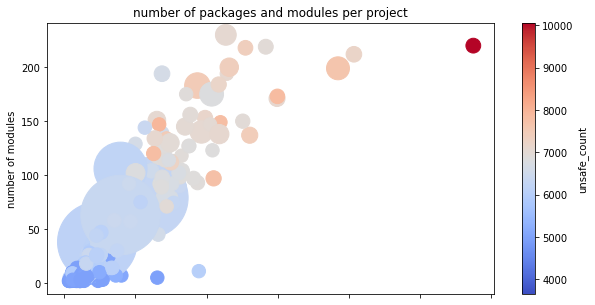

In [40]:
df1 = package_df\
    .groupby('project_name')['import_path'].nunique()

df2 = package_df\
    .groupby('project_name')['module_path'].nunique()

df3 = grep_df\
    .groupby('project_name')\
    .agg(unsafe_count=pd.NamedAgg(column='project_name', aggfunc='count'))

df4 = vet_df\
    .groupby('project_name')\
    .agg(vet_count=pd.NamedAgg(column='project_name', aggfunc='count'))

mdf1 = pd.merge(df1, df2, how='inner', on='project_name')
mdf2 = pd.merge(mdf1, df3, how='left', on='project_name')
mdf3 = pd.merge(mdf2, df4, how='left', on='project_name').fillna(0)

mdf3\
    .plot.scatter(x='import_path', y='module_path', c='unsafe_count', cmap="coolwarm", s=mdf3['vet_count'],
                  title='number of packages and modules per project',
                  figsize=(10,5))

plt.xlabel('number of packages')
plt.ylabel('number of modules')
plt.show()

Wir können sehen, dass die Projekte mit höherer unsafe Anzahl eher weniger Vet Ergebnisse haben.

## Prozentsatz von unsafe.Pointer nutzenden Modulen

In [41]:
total_modules_count = package_df['module_path'].nunique()
unsafe_modules_count = grep_df['module_path'].nunique()

In [42]:
print("{} of {} modules ({:.1%}) have at least one unsafe usage."\
      .format(unsafe_modules_count, total_modules_count, unsafe_modules_count/total_modules_count))

580 of 3202 modules (18.1%) have at least one unsafe usage.


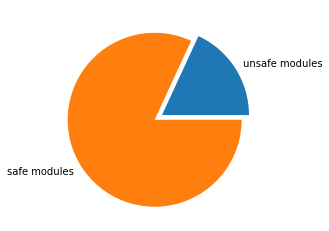

In [43]:
data = [unsafe_modules_count, total_modules_count - unsafe_modules_count]

plt.pie(data, labels=['unsafe modules', 'safe modules'], explode=(0, 0.1))

plt.show()

## Prozentsatz von unsafe.Pointer nutzenden Packages

In [44]:
total_packages_count = package_df['import_path'].nunique()
unsafe_packages_count = grep_df['package_import_path'].nunique()

In [45]:
print("{} of {} packages ({:.1%}) have at least one unsafe usage."\
      .format(unsafe_packages_count, total_packages_count, unsafe_packages_count/total_packages_count))

1361 of 40845 packages (3.3%) have at least one unsafe usage.


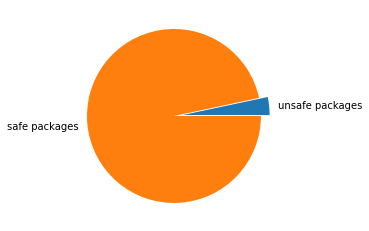

In [46]:
data = [unsafe_packages_count, total_packages_count - unsafe_packages_count]

plt.pie(data, labels=['unsafe packages', 'safe packages'], explode=(0, 0.1))

plt.show()

## Verteilung von unsafe auf verschiedene match types

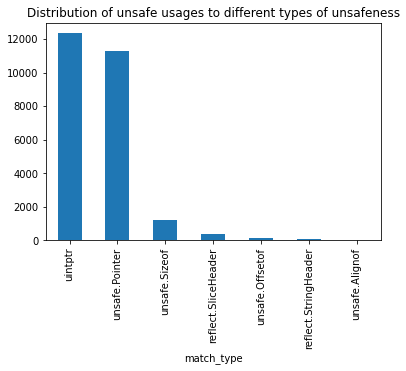

In [47]:
grep_df\
    .groupby(['match_type', 'package_import_path', 'project_name'])['match_type'].count()\
    .groupby(['match_type', 'package_import_path']).max()\
    .groupby('match_type').sum()\
    .sort_values(ascending=False)\
    .plot.bar(title='Distribution of unsafe usages to different types of unsafeness')

In [48]:
grep_df\
    .groupby(['match_type', 'package_import_path', 'project_name'])['match_type'].count()\
    .groupby(['match_type', 'package_import_path']).max()\
    .groupby('match_type').sum()\
    .sort_values(ascending=False)

match_type
uintptr                 12347
unsafe.Pointer          11312
unsafe.Sizeof            1198
reflect.SliceHeader       370
unsafe.Offsetof           120
reflect.StringHeader      110
unsafe.Alignof             41
Name: match_type, dtype: int64

unsafe.Pointer und uintprt dominieren klar. Vermutlich werden sie fast immer gemeinsam genutzt. unsafe.Sizeof ist ebenfalls noch relativ häufig vertreten. Die anderen Typen sind im Vergleich extrem selten. Genau das könnte aber bedeuten, dass es Sinn macht sich diese manuell anzuschauen!

## Gleichzeitige Verwendung von uintptr und unsafe.Pointer pro Zeile

In [49]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

df2 = grep_df\
    .where(grep_df['match_type']=='uintptr').dropna()\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

mdf = pd.merge(df1, df2, how='outer', on=['package_import_path', 'file_name', 'line_number'])\
    .loc[:,['package_import_path', 'file_name', 'line_number', 'text_x', 'context_x', 'text_y', 'context_y', 
            'match_type_x', 'match_type_y']]

simultaneous_usages_df = mdf.dropna()
uintptr_without_unsafePointer_df = mdf.loc[mdf['match_type_x'].isnull()]
unsafePointer_without_uintptr_df = mdf.loc[mdf['match_type_y'].isnull()]

In [50]:
print("Number of unsafe.Pointer lines: {}".format(df1['line_number'].count()))
print("Number of uintptr lines: {}".format(df2['line_number'].count()))
print()
print("Number of simultaneous usages: {}".format(simultaneous_usages_df['line_number'].count()))
print("unsafe.Pointer used without uintptr: {}".format(unsafePointer_without_uintptr_df['line_number'].count()))
print("uintptr used without unsafe.Pointer: {}".format(uintptr_without_unsafePointer_df['line_number'].count()))

Number of unsafe.Pointer lines: 12135
Number of uintptr lines: 11951

Number of simultaneous usages: 2585
unsafe.Pointer used without uintptr: 9550
uintptr used without unsafe.Pointer: 9366


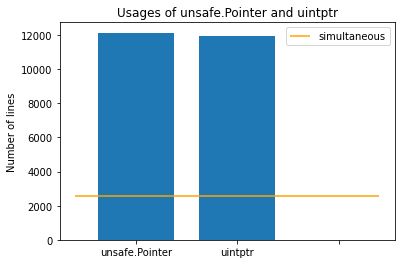

In [51]:
total_data = [df1['line_number'].count(), df2['line_number'].count(), 0]
idx = np.arange(3)/3

simultaneous_usages_df['line_number'].count()

plt.hlines(simultaneous_usages_df['line_number'].count(), -0.2, 0.8, colors='orange', label='simultaneous')
plt.bar(idx, total_data, width=0.25)

plt.ylabel('Number of lines')
plt.xticks(idx, ['unsafe.Pointer', 'uintptr', ''])
plt.legend()
plt.title('Usages of unsafe.Pointer and uintptr')

plt.show()

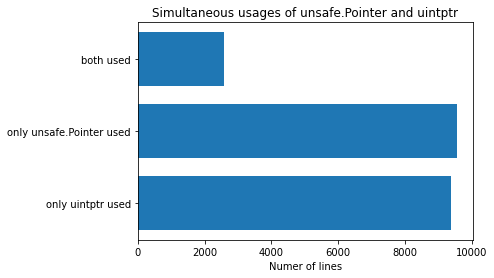

In [52]:
data = [uintptr_without_unsafePointer_df['line_number'].count(),
        unsafePointer_without_uintptr_df['line_number'].count(),
        simultaneous_usages_df['line_number'].count()]
idx = np.arange(3)/3
width = 0.25

plt.barh(idx, data, width)
plt.xlabel('Numer of lines')
plt.yticks(idx, ['only uintptr used', 'only unsafe.Pointer used', 'both used'])
plt.title('Simultaneous usages of unsafe.Pointer and uintptr')

plt.show()

In [53]:
print("simultaneous:")
print(simultaneous_usages_df['text_x'].iloc[11])

print("only unsafe.Pointer:")
print(unsafePointer_without_uintptr_df['text_x'].iloc[10])

print("only uintptr:")
print(uintptr_without_unsafePointer_df['text_y'].iloc[10])

simultaneous:
func callCgoMunmap(addr unsafe.Pointer, n uintptr)

only unsafe.Pointer:
	_cgo_set_context_function     unsafe.Pointer

only uintptr:
		wbBufFlush(slot, uintptr(new))



## Gleichzeitige Verwendung von uintptr und unsafe.Pointer pro Datei

In [54]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .drop_duplicates(subset=['package_import_path', 'file_name'])

df2 = grep_df\
    .where(grep_df['match_type']=='uintptr').dropna()\
    .drop_duplicates(subset=['package_import_path', 'file_name'])

mdf = pd.merge(df1, df2, how='left', on=['package_import_path', 'file_name'])\
    .loc[:,['package_import_path', 'file_name', 'line_number_x', 'line_number_y', 
            'text_x', 'context_x', 'text_y', 'context_y', 
            'match_type_x', 'match_type_y']]

same_file_usages_df = mdf.dropna()

In [55]:
print("Number of unsafe.Pointer files: {}".format(df1['line_number'].count()))
print("Number of uintptr files: {}".format(df2['line_number'].count()))
print()
print("Number of files with both usages: {}".format(same_file_usages_df['line_number_x'].count()))

Number of unsafe.Pointer files: 1061
Number of uintptr files: 1147

Number of files with both usages: 496


In [56]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

df2 = grep_df\
    .where(grep_df['match_type']=='uintptr').dropna()\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

unsafePointer_same_file_usages_df = pd.merge(df1, df2, how='left', on=['package_import_path', 'file_name'])\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number_x'])\
    .dropna()\
    .loc[:,['package_import_path', 'file_name', 'line_number_x', 'line_number_y', 
            'text_x', 'context_x', 'text_y', 'context_y', 
            'match_type_x', 'match_type_y']]

uintptr_same_file_usages_df = pd.merge(df1, df2, how='right', on=['package_import_path', 'file_name'])\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number_y'])\
    .dropna()\
    .loc[:,['package_import_path', 'file_name', 'line_number_x', 'line_number_y', 
            'text_x', 'context_x', 'text_y', 'context_y', 
            'match_type_x', 'match_type_y']]

In [57]:
print("Number of unsafe.Pointer lines: {}".format(df1['line_number'].count()))
print("Number of uintptr lines: {}".format(df2['line_number'].count()))
print()
print("Number of usages of unsafe.Pointer in files where at least one other uintptr occurs: {}"\
      .format(unsafePointer_same_file_usages_df['line_number_x'].count()))
print("Number of usages of uinttr in files where at least one other unsafe.Pointer occurs: {}"\
      .format(uintptr_same_file_usages_df['line_number_x'].count()))

Number of unsafe.Pointer lines: 12135
Number of uintptr lines: 11951

Number of usages of unsafe.Pointer in files where at least one other uintptr occurs: 6846
Number of usages of uinttr in files where at least one other unsafe.Pointer occurs: 5939


## Vet Ergebnisse pro Projekt

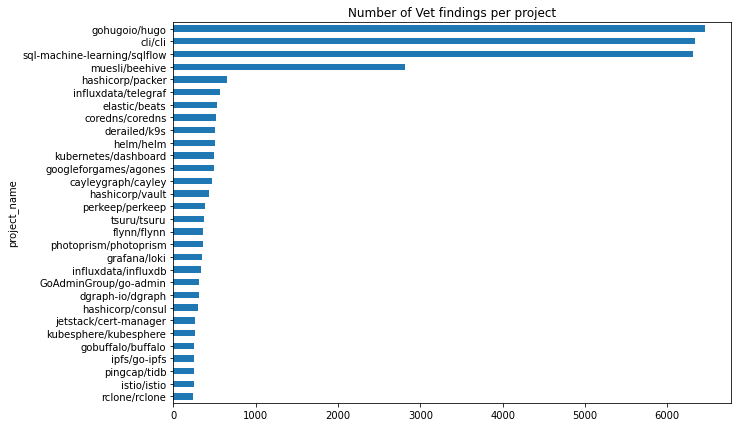

In [58]:
vet_df\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=True)[-30:]\
    .plot.barh(title='Number of Vet findings per project', figsize=(10,7))

In [59]:
vet_df\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=False)

project_name
gohugoio/hugo                   6458
cli/cli                         6342
sql-machine-learning/sqlflow    6309
muesli/beehive                  2815
hashicorp/packer                 654
                                ... 
golang/lint                      180
go-xorm/xorm                     180
hybridgroup/gocv                 179
buger/jsonparser                 179
panjf2000/ants                   179
Name: project_name, Length: 338, dtype: int64

In [60]:
vet_df[vet_df['project_name']=='kubernetes/kubernetes']

,message,context,line_number,column,raw_output,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,file_copy_path
0,possible misuse of unsafe.Pointer,"\t\t\tif !CompareAndSwapPointer(&vp.typ, nil, ...",59,44,/usr/local/go/src/sync/atomic/value.go:59:44: ...,value.go,86,2446,sync/atomic,std,std,kubernetes/kubernetes,sync/atomic/value.go
1,possible misuse of unsafe.Pointer,\treturn unsafe.Pointer(x ^ 0),287,9,/root/go/pkg/mod/github.com/modern-go/reflect2...,reflect2.go,298,7272,github.com/modern-go/reflect2,github.com/modern-go/reflect2,v1.0.1,kubernetes/kubernetes,github.com/modern-go/reflect2/reflect2.go
2,unreachable code,\treturn nil,262,2,/root/go/pkg/mod/google.golang.org/protobuf@v1...,decode.go,789,21031,google.golang.org/protobuf/encoding/prototext,google.golang.org/protobuf,v1.23.0,kubernetes/kubernetes,google.golang.org/protobuf/encoding/prototext/...
3,possible misuse of unsafe.Pointer,\tsize := *(*uintptr)(unsafe.Pointer(ptr + uns...,56,22,/usr/local/go/src/runtime/alg.go:56:22: possib...,alg.go,389,10428,runtime,std,std,kubernetes/kubernetes,runtime/alg.go
4,possible misuse of unsafe.Pointer,\told := unsafe.Pointer(sync_atomic_SwapUintpt...,63,9,/usr/local/go/src/runtime/atomic_pointer.go:63...,atomic_pointer.go,77,2683,runtime,std,std,kubernetes/kubernetes,runtime/atomic_pointer.go
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,golang.org/x/text/encoding/internal.FuncEncodi...,"\tinternal.FuncEncoding{iso2022JPNewDecoder, i...",20,2,/root/go/pkg/mod/golang.org/x/text@v0.3.2/enco...,iso2022jp.go,299,6772,golang.org/x/text/encoding/japanese,golang.org/x/text,v0.3.2,kubernetes/kubernetes,golang.org/x/text/encoding/japanese/iso2022jp.go
274,golang.org/x/text/encoding/internal.Encoding c...,var shiftJIS = internal.Encoding{\n\t&internal...,20,16,/root/go/pkg/mod/golang.org/x/text@v0.3.2/enco...,shiftjis.go,189,4290,golang.org/x/text/encoding/japanese,golang.org/x/text,v0.3.2,kubernetes/kubernetes,golang.org/x/text/encoding/japanese/shiftjis.go
275,golang.org/x/text/encoding/internal.SimpleEnco...,"\t&internal.SimpleEncoding{shiftJISDecoder{}, ...",21,3,/root/go/pkg/mod/golang.org/x/text@v0.3.2/enco...,shiftjis.go,189,4290,golang.org/x/text/encoding/japanese,golang.org/x/text,v0.3.2,kubernetes/kubernetes,golang.org/x/text/encoding/japanese/shiftjis.go
276,unreachable code,"\treturn s, nil",770,2,/root/go/pkg/mod/github.com/magiconair/propert...,properties.go,833,22854,github.com/magiconair/properties,github.com/magiconair/properties,v1.8.1,kubernetes/kubernetes,github.com/magiconair/properties/properties.go


Kubernetes hat erstaunlich wenige Vet Ergebnisse. Hugo ist so weit vorne weil das `chroma` Modul eingebunden wird (siehe nächste Analyse).

## Vet Ergebnisse pro Modul

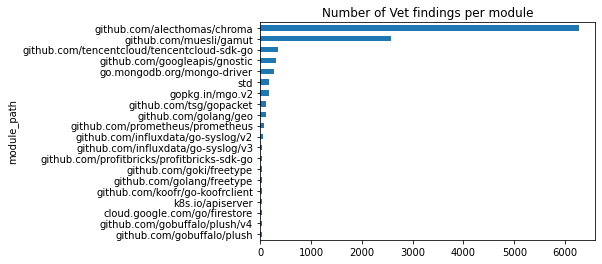

In [61]:
vet_df\
    .groupby(['module_path', 'project_name'])['module_path'].count()\
    .groupby('module_path').max()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Number of Vet findings per module')

In [62]:
vet_df\
    .groupby(['module_path', 'project_name'])['module_path'].count()\
    .groupby('module_path').max()\
    .sort_values(ascending=False)[:20]

module_path
github.com/alecthomas/chroma                   6272
github.com/muesli/gamut                        2565
github.com/tencentcloud/tencentcloud-sdk-go     360
github.com/googleapis/gnostic                   308
go.mongodb.org/mongo-driver                     274
std                                             180
gopkg.in/mgo.v2                                 172
github.com/tsg/gopacket                         113
github.com/golang/geo                           112
github.com/prometheus/prometheus                 67
github.com/influxdata/go-syslog/v2               48
github.com/influxdata/go-syslog/v3               47
github.com/profitbricks/profitbricks-sdk-go      39
github.com/goki/freetype                         38
github.com/golang/freetype                       36
github.com/koofr/go-koofrclient                  35
k8s.io/apiserver                                 34
cloud.google.com/go/firestore                    30
github.com/gobuffalo/plush/v4                    29


Interessanterweise sind die beiden ersten, mit deutlichem Abstand führenden Module, mit Farben beschäftigt. Was geht mit diesen Farben ab?

## Vet Ergebnisse pro Package

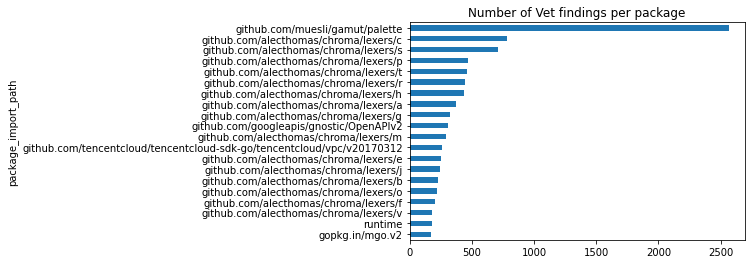

In [63]:
vet_df\
    .groupby(['package_import_path', 'project_name'])['package_import_path'].count()\
    .groupby('package_import_path').max()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Number of Vet findings per package')

In [64]:
vet_df\
    .groupby(['package_import_path', 'project_name'])['package_import_path'].count()\
    .groupby('package_import_path').max()\
    .sort_values(ascending=False)[:20]

package_import_path
github.com/muesli/gamut/palette                                           2565
github.com/alecthomas/chroma/lexers/c                                      779
github.com/alecthomas/chroma/lexers/s                                      712
github.com/alecthomas/chroma/lexers/p                                      468
github.com/alecthomas/chroma/lexers/t                                      462
github.com/alecthomas/chroma/lexers/r                                      445
github.com/alecthomas/chroma/lexers/h                                      440
github.com/alecthomas/chroma/lexers/a                                      369
github.com/alecthomas/chroma/lexers/g                                      324
github.com/googleapis/gnostic/OpenAPIv2                                    308
github.com/alecthomas/chroma/lexers/m                                      288
github.com/tencentcloud/tencentcloud-sdk-go/tencentcloud/vpc/v20170312     258
github.com/alecthomas/chroma/lex

## Vet Ergebnisse im Zusammenhang mit unsafe

In [65]:
df1 = grep_df\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

df2 = vet_df\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

mdf = pd.merge(df1, df2, how='outer', on=['package_import_path', 'file_name', 'line_number'])\
    .loc[:,['package_import_path', 'file_name', 'line_number', 'text', 'context_x', 'match_type', 'message']]

vet_and_unsafe_df = mdf.dropna()
only_vet_df = mdf.loc[mdf['text'].isnull()]
only_unsafe_df = mdf.loc[mdf['message'].isnull()]

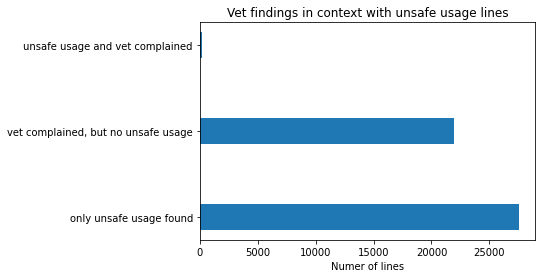

In [66]:
data = [only_unsafe_df['line_number'].count(),
        only_vet_df['line_number'].count(),
        vet_and_unsafe_df['line_number'].count()]
idx = np.arange(3)/3
width = 0.1

plt.barh(idx, data, width)
plt.xlabel('Numer of lines')
plt.yticks(idx, ['only unsafe usage found', 'vet complained, but no unsafe usage', 'unsafe usage and vet complained'])
plt.title('Vet findings in context with unsafe usage lines')

plt.show()

Nur in einer kleinen Menge der unsafe Usages hat sich Vet darüber beschwert.

## Anzahl unsafe.Pointer usages, die von Vet erkannt wurden

In [67]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

df2 = vet_df\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])\
    .loc[:,['package_import_path', 'file_name', 'line_number', 'message']]

vet_unsafePointer_df = pd.merge(df1, df2, how='outer', on=['package_import_path', 'file_name', 'line_number'])\
    .dropna()\
    .loc[:,['project_name', 'module_path', 'module_version', 'package_import_path', 'match_type', 
            'file_name', 'line_number', 'text', 'context', 'message']]

In [68]:
print("Number of lines with unsafe.Pointer usage that were flagged by vet: {}"\
      .format(vet_unsafePointer_df['message'].count()))
print()
print("Vet messages on these lines:")
print(vet_unsafePointer_df['message'].sort_values())

Number of lines with unsafe.Pointer usage that were flagged by vet: 206

Vet messages on these lines:
21       possible misuse of unsafe.Pointer
1029     possible misuse of unsafe.Pointer
1030     possible misuse of unsafe.Pointer
1031     possible misuse of unsafe.Pointer
1035     possible misuse of unsafe.Pointer
                       ...                
627      possible misuse of unsafe.Pointer
630      possible misuse of unsafe.Pointer
637      possible misuse of unsafe.Pointer
606      possible misuse of unsafe.Pointer
14068    possible misuse of unsafe.Pointer
Name: message, Length: 206, dtype: object


Wir sehen hier, dass alle Zeilen mit Vet Ergebnis und Grep Ergebnis tatsächlich die Nachricht `possible misuse of unsafe.Pointer` zeigen. Diese sind also definitiv näher zu betrachten.

In [69]:
#vet_unsafePointer_df.to_csv('/root/data/classification/interesting_snippets_vet_unsafePointer.csv', index=False)

## Gesamtmenge der erkannten possible misuse of unsafe.Pointer (Vet)

Wie viele Vet Nachrichtzeilen, die possible misuse of unsafe.Pointer lauten, gibt es insgesamt?

In [70]:
vet_df\
    .where(vet_df['message']=='possible misuse of unsafe.Pointer')\
    .dropna()\
    ['message'].count()

60939

Und wie viele sind es, wenn Duplikate entfernt werden?

In [71]:
vet_df\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])\
    .where(vet_df['message']=='possible misuse of unsafe.Pointer')\
    .dropna()\
    ['message'].count()

206

Wir sehen, dass nach Duplikatentfernung nun noch genau die 211 Nachrichten verbleiben, die auch oben gefunden wurden. Dies ist zu erwarten, schließlich wäre es verwunderlich wenn sich Go Vet über einen unsafe.Pointer beschweren würde wenn es in der betreffenden Zeile gar keine unsafe.Pointer Usage gäbe.

Die drastische Reduktion der Fallzahlen muss also darauf deuten, dass die Vet Findings in Packages liegen, die wirklich häufig importiert werden. Welche sind dies?

In [72]:
vet_df\
    .where(vet_df['message']=='possible misuse of unsafe.Pointer')\
    .dropna()\
    .groupby('package_import_path')['line_number'].count()\
    .sort_values(ascending=False)

package_import_path
runtime                                    60164
sync/atomic                                  338
strings                                      335
github.com/modern-go/reflect2                 46
golang.org/x/sys/unix                         16
github.com/spaolacci/murmur3                  11
gorgonia.org/tensor                            8
github.com/apache/arrow/go/arrow/math          6
github.com/minio/simdjson-go                   4
github.com/apache/arrow/go/arrow/memory        4
github.com/AndreasBriese/bbloom                4
github.com/coocood/bbloom                      2
github.com/segmentio/encoding/json             1
Name: line_number, dtype: int64

Und welche Packages sind es nach der Deduplizierung?

In [73]:
vet_df\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])\
    .where(vet_df['message']=='possible misuse of unsafe.Pointer')\
    .dropna()\
    .groupby('package_import_path')['line_number'].count()\
    .sort_values(ascending=False)

package_import_path
runtime                                    175
gorgonia.org/tensor                          8
github.com/apache/arrow/go/arrow/math        6
github.com/minio/simdjson-go                 3
github.com/apache/arrow/go/arrow/memory      3
github.com/spaolacci/murmur3                 2
github.com/coocood/bbloom                    2
github.com/AndreasBriese/bbloom              2
sync/atomic                                  1
strings                                      1
golang.org/x/sys/unix                        1
github.com/segmentio/encoding/json           1
github.com/modern-go/reflect2                1
Name: line_number, dtype: int64

Darstellung der Vet Ergebnisse pro Package auf die Beliebtheit des Packages:

## Gosec Ergebnisse pro Projekt

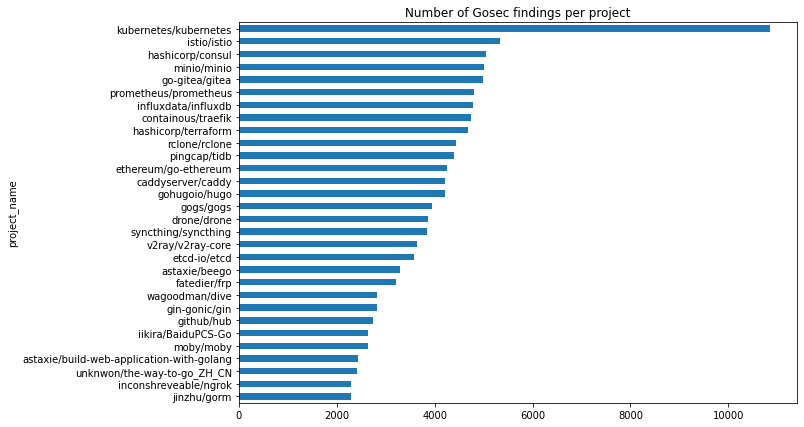

In [74]:
gosec_df\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=True)[-30:]\
    .plot.barh(title='Number of Gosec findings per project', figsize=(10,7))

In [75]:
gosec_df\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=False)

project_name
kubernetes/kubernetes                        10861
istio/istio                                   5344
hashicorp/consul                              5041
minio/minio                                   5013
go-gitea/gitea                                4982
prometheus/prometheus                         4802
influxdata/influxdb                           4785
containous/traefik                            4746
hashicorp/terraform                           4674
rclone/rclone                                 4444
pingcap/tidb                                  4398
ethereum/go-ethereum                          4259
caddyserver/caddy                             4219
gohugoio/hugo                                 4205
gogs/gogs                                     3935
drone/drone                                   3854
syncthing/syncthing                           3852
v2ray/v2ray-core                              3639
etcd-io/etcd                                  3575
astaxie/beego     

## Gosec Ergebnisse pro Modul

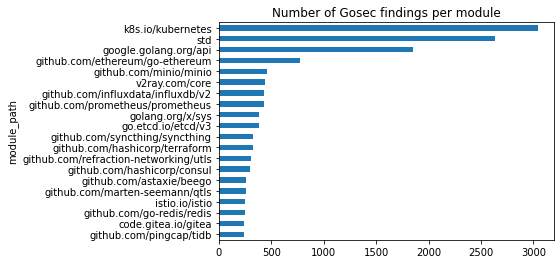

In [76]:
gosec_df\
    .groupby(['module_path', 'project_name'])['module_path'].count()\
    .groupby('module_path').max()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Number of Gosec findings per module')

In [77]:
gosec_df\
    .groupby(['module_path', 'project_name'])['module_path'].count()\
    .groupby('module_path').max()\
    .sort_values(ascending=False)[:20]

module_path
k8s.io/kubernetes                        3041
std                                      2630
google.golang.org/api                    1853
github.com/ethereum/go-ethereum           774
github.com/minio/minio                    455
v2ray.com/core                            440
github.com/influxdata/influxdb/v2         432
github.com/prometheus/prometheus          429
golang.org/x/sys                          387
go.etcd.io/etcd/v3                        383
github.com/syncthing/syncthing            328
github.com/hashicorp/terraform            321
github.com/refraction-networking/utls     307
github.com/hashicorp/consul               299
github.com/astaxie/beego                  261
github.com/marten-seemann/qtls            257
istio.io/istio                            246
github.com/go-redis/redis                 245
code.gitea.io/gitea                       243
github.com/pingcap/tidb                   241
Name: module_path, dtype: int64

## Gosec Ergebnisse pro Package

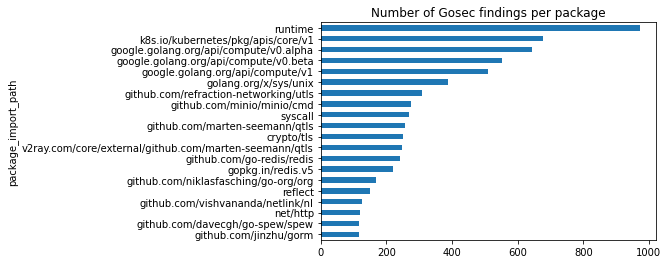

In [78]:
gosec_df\
    .groupby(['package_import_path', 'project_name'])['package_import_path'].count()\
    .groupby('package_import_path').max()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Number of Gosec findings per package')

In [79]:
gosec_df\
    .groupby(['package_import_path', 'project_name'])['package_import_path'].count()\
    .groupby('package_import_path').max()\
    .sort_values(ascending=False)[:20]

package_import_path
runtime                                                   972
k8s.io/kubernetes/pkg/apis/core/v1                        676
google.golang.org/api/compute/v0.alpha                    645
google.golang.org/api/compute/v0.beta                     551
google.golang.org/api/compute/v1                          508
golang.org/x/sys/unix                                     387
github.com/refraction-networking/utls                     307
github.com/minio/minio/cmd                                276
syscall                                                   268
github.com/marten-seemann/qtls                            257
crypto/tls                                                249
v2ray.com/core/external/github.com/marten-seemann/qtls    247
github.com/go-redis/redis                                 241
gopkg.in/redis.v5                                         220
github.com/niklasfasching/go-org/org                      168
reflect                                           

## Gosec Ergebnisse im Zusammenhang mit Unsafe

In [80]:
df1 = grep_df\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

df2 = gosec_df\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

mdf = pd.merge(df1, df2, how='outer', on=['package_import_path', 'file_name', 'line_number'])\
    .loc[:,['package_import_path', 'file_name', 'line_number', 'text', 'context_x', 'match_type', 'message']]

gosec_and_unsafe_df = mdf.dropna()
only_gosec_df = mdf.loc[mdf['text'].isnull()]
only_unsafe_gosec = mdf.loc[mdf['message'].isnull()]

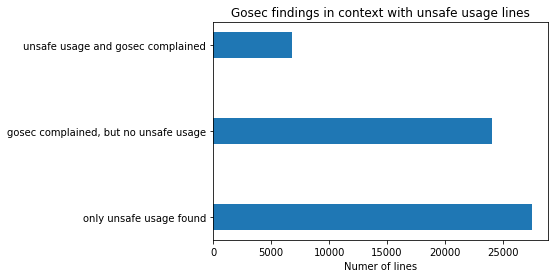

In [81]:
data = [only_unsafe_df['line_number'].count(),
        only_gosec_df['line_number'].count(),
        gosec_and_unsafe_df['line_number'].count()]
idx = np.arange(3)/3
width = 0.1

plt.barh(idx, data, width)
plt.xlabel('Numer of lines')
plt.yticks(idx, ['only unsafe usage found', 'gosec complained, but no unsafe usage', 'unsafe usage and gosec complained'])
plt.title('Gosec findings in context with unsafe usage lines')

plt.show()

## unsafe.Pointer usages, die von Gosec erkannt wurden

In [82]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

df2 = gosec_df\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])\
    .loc[:,['package_import_path', 'file_name', 'line_number', 'message']]

gosec_unsafePointer_df = pd.merge(df1, df2, how='outer', on=['package_import_path', 'file_name', 'line_number'])\
    .dropna()\
    .loc[:,['project_name', 'module_path', 'module_version', 'package_import_path', 'match_type', 
            'file_name', 'line_number', 'text', 'context', 'message']]

In [83]:
print("Number of lines with unsafe.Pointer usage that were flagged by gosec: {}"\
      .format(gosec_unsafePointer_df['message'].count()))
print()
print("Gosec messages on these lines:")

gosec_unsafePointer_df\
    .groupby('message')['message'].count()

Number of lines with unsafe.Pointer usage that were flagged by gosec: 4226

Gosec messages on these lines:


message
Errors unhandled.                           2
Use of unsafe calls should be audited    4224
Name: message, dtype: int64

Ein erstaunliches Ergebnis, denn die unsafe Regel in Gosec prüft eigentlich ausschließlich, ob unsafe.Pointer überhaupt verwendet wird. Das heißt es sollten eigentlich alle Zeilen, in denen ich mit Grep unsafe.Pointer gefunden habe, auch von Gosec gefunden werden. Das ist offensichtlich (zahlenmäßig) nicht der Fall:

In [84]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .drop_duplicates(subset=['line_number', 'file_name', 'package_import_path'])\
    ['line_number'].count()

14465

Allerdings werden offenbar zumindest ca. die Hälfte der Fälle erkannt. Speichern der Fälle, um sie manuell zu clustern:

In [ ]:
#gosec_unsafePointer_df.to_csv('/root/data/classification/interesting_snippets_gosec_unsafePointer.csv')

## Verteilung unsafe.Pointer usage auf Stars/Forks/LastPushAge

In [85]:
df1 = grep_df\
    .groupby('project_name')\
    .agg(unsafe_count=pd.NamedAgg(column='project_name', aggfunc='count'))

df2 = projects_df

unsafe_by_project_features_df = pd.merge(df1, df2, how='left', on=['project_name'])

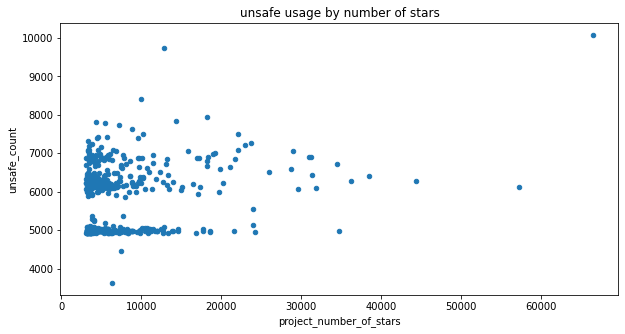

In [86]:
unsafe_by_project_features_df\
    .plot.scatter(x='project_number_of_stars', y='unsafe_count',
                  title='unsafe usage by number of stars', 
                  figsize=(10,5))

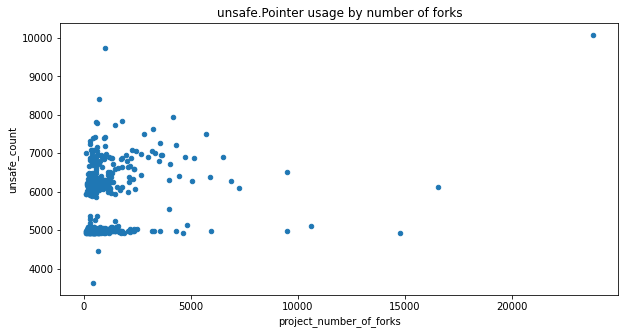

In [87]:
unsafe_by_project_features_df\
    .plot.scatter(x='project_number_of_forks', y='unsafe_count',
                  title='unsafe.Pointer usage by number of forks', 
                  figsize=(10,5))

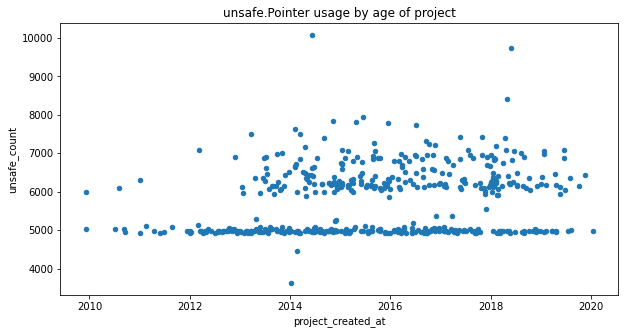

In [88]:
unsafe_by_project_features_df\
    .plot.scatter(x='project_created_at', y='unsafe_count',
                  title='unsafe.Pointer usage by age of project', 
                  figsize=(10,5))

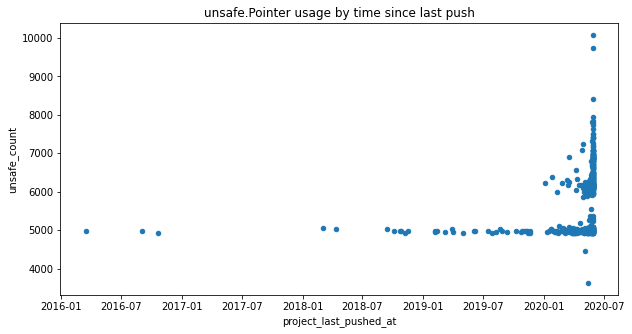

In [89]:
unsafe_by_project_features_df\
    .plot.scatter(x='project_last_pushed_at', y='unsafe_count',
                  title='unsafe.Pointer usage by time since last push',
                  figsize=(10,5))

## unsafe usage pro Modul, gewichtet nach Modulbeliebtheit

In [90]:
df1 = grep_df\
    .groupby(['module_path', 'project_name'])\
    .agg(unsafe_count=pd.NamedAgg(column='module_path', aggfunc='count'))\
    .groupby('module_path').max()\
    .reset_index()

df2 = package_df\
    .groupby('module_path')\
    .agg(import_count=pd.NamedAgg(column='project_name', aggfunc='nunique'))\
    .reset_index()

unsafe_modules_weighted_popularity_df = pd.merge(df1, df2, how='inner', on=['module_path'])

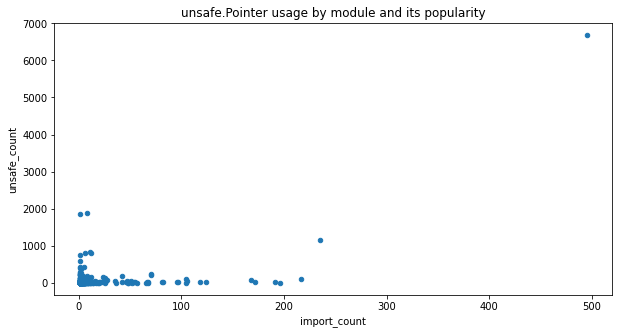

In [91]:
unsafe_modules_weighted_popularity_df\
    .plot.scatter(x='import_count', y='unsafe_count', 
                  title='unsafe.Pointer usage by module and its popularity',
                  figsize=(10,5))

Offensichtlich wäre der interessanteste Punkt das Modul ganz oben rechts. Das ist allerdings die Standardlibrary. Hat sie besseren Code als andere Module?

Analyse ohne die Standardlibrary:

In [92]:
df1 = grep_df\
    .where(grep_df['module_path']!='std')\
    .groupby(['module_path', 'project_name'])\
    .agg(unsafe_count=pd.NamedAgg(column='module_path', aggfunc='count'))\
    .groupby('module_path').max()

df2 = package_df\
    .groupby('module_path')\
    .agg(import_count=pd.NamedAgg(column='project_name', aggfunc='nunique'))

df = pd.merge(df1, df2, how='left', on=['module_path'])

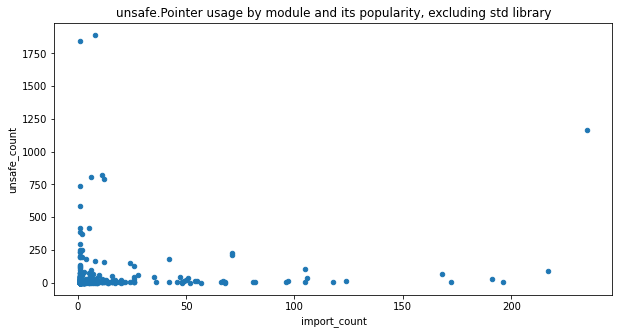

In [93]:
df.plot.scatter(x='import_count', y='unsafe_count', 
                title='unsafe.Pointer usage by module and its popularity, excluding std library',
                figsize=(10,5))

## unsafe Usages und LOC pro Modul

In [94]:
df1 = grep_df\
    .where(grep_df['module_path']!='std')\
    .groupby(['module_path', 'project_name'])\
    .agg(unsafe_count=pd.NamedAgg(column='module_path', aggfunc='count'))\
    .groupby('module_path').max()\
    .reset_index()

df2 = package_df\
    .where(grep_df['module_path']!='std')\
    .groupby('module_path')\
    .agg(loc=pd.NamedAgg(column='loc', aggfunc='sum'))\
    .reset_index()

df = pd.merge(df1, df2, how='inner', on=['module_path'])

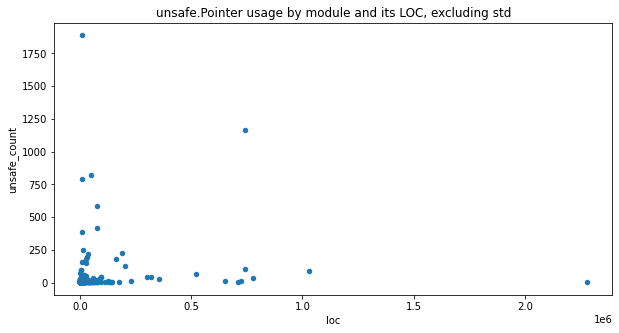

In [95]:
df.plot.scatter(x='loc', y='unsafe_count', 
                title='unsafe.Pointer usage by module and its LOC, excluding std',
                figsize=(10,5))

## Interessanteste Module gemäß Score aus Anzahl unsafe und Beliebtheit

In [96]:
weighted_df = unsafe_modules_weighted_popularity_df.reset_index()

weighted_df['score'] = weighted_df[['unsafe_count', 'import_count']]\
    .apply(lambda x: x['unsafe_count'] * x['import_count'], axis=1)

weighted_df\
    .sort_values(by='score', ascending=False)[:20]

,index,module_path,unsafe_count,import_count,score
576,576,std,6676,495,3304620
512,512,golang.org/x/sys,1163,235,273305
510,510,golang.org/x/net,91,217,19747
280,280,github.com/json-iterator/go,225,71,15975
328,328,github.com/modern-go/reflect2,215,71,15265
558,558,k8s.io/kubernetes,1887,8,15096
219,219,github.com/golang/protobuf,65,168,10920
216,216,github.com/gogo/protobuf,103,105,10815
242,242,github.com/hashicorp/go-msgpack,792,12,9504
454,454,github.com/ugorji/go/codec,823,11,9053


Nach der Standardlibrary und dem `sys` Paket scheinen vor allem diese Module interessant zu sein:

 - k8s.io/kubernetes weil es sehr viele unsafe.Pointer usages hat
 - github.com/json-iterator/go weil es vergleichsweise häufig importiert wird und unsafe.Pointer usages hat
 - github.com/modern-go/reflect2	 weil es vergleichsweise häufig importiert wird, unsafe.Pointer usages hat und nicht von golang.org ist
 - github.com/golang/protobuf aus dem gleichen Grund

## Top 10 häufigste unsafe.Pointer Snippets

In [97]:
usages = grep_df\
    .groupby(['text'])\
    .agg(count=pd.NamedAgg(column='text', aggfunc='count')).reset_index()\
    .sort_values(by='count', ascending=False)[:10]

for i, usage in usages.iterrows():
    print("{} usages:".format(usage['count']))
    print(usage['text'])

14497 usages:
	var _p0 unsafe.Pointer

14497 usages:
		_p0 = unsafe.Pointer(&_zero)

12359 usages:
		return &(*u)(unsafe.Pointer(t)).u

8910 usages:
	b := (*bmap)(unsafe.Pointer(uintptr(h.buckets) + bucket*uintptr(t.bucketsize)))

6669 usages:
	_, _, e1 := Syscall6(SYS_MOUNT, uintptr(unsafe.Pointer(_p0)), uintptr(unsafe.Pointer(_p1)), uintptr(unsafe.Pointer(_p2)), uintptr(flags), uintptr(unsafe.Pointer(data)), 0)

5940 usages:
	hash := t.hasher(noescape(unsafe.Pointer(&key)), uintptr(h.hash0))

5928 usages:
	r0, _, e1 := Syscall6(SYS_SPLICE, uintptr(rfd), uintptr(unsafe.Pointer(roff)), uintptr(wfd), uintptr(unsafe.Pointer(woff)), uintptr(len), uintptr(flags))

5928 usages:
	r0, _, e1 := Syscall6(SYS_RECVFROM, uintptr(fd), uintptr(_p0), uintptr(len(p)), uintptr(flags), uintptr(unsafe.Pointer(from)), uintptr(unsafe.Pointer(fromlen)))

5187 usages:
		_p0 = unsafe.Pointer(&p[0])

5187 usages:
	_, _, e1 := Syscall6(SYS_SETXATTR, uintptr(unsafe.Pointer(_p0)), uintptr(unsafe.Pointer(_p1)), ui

## Top 350 interessanteste unsafe.Pointer Snippets

In [98]:
weighted_df.sort_values(by='import_count', ascending=False)[:20]

,index,module_path,unsafe_count,import_count,score
576,576,std,6676,495,3304620
512,512,golang.org/x/sys,1163,235,273305
510,510,golang.org/x/net,91,217,19747
513,513,golang.org/x/text,2,196,392
508,508,golang.org/x/crypto,28,191,5348
375,375,github.com/pkg/errors,6,172,1032
219,219,github.com/golang/protobuf,65,168,10920
520,520,google.golang.org/grpc,13,124,1612
312,312,github.com/mattn/go-isatty,4,118,472
138,138,github.com/davecgh/go-spew,38,106,4028


In [99]:
interesting_snippets_df = grep_df\
    .where((grep_df['module_path']=='golang.org/x/net') | 
           (grep_df['module_path']=='golang.org/x/crypto') |
           (grep_df['module_path']=='github.com/golang/protobuf') |
           (grep_df['module_path']=='github.com/json-iterator/go'))\
    .drop_duplicates(subset=['text'])\
    .dropna()

Die Anzahl der einzelnen Posten stimmt nicht mit der Tabelle oben überein, weil dort Duplikate nicht gedroppt werden.

In [100]:
interesting_snippets_df

,text,context,line_number,column,absolute_offset,match_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,file_copy_path
5161,\treturn *(*string)(unsafe.Pointer(&any.buf))\n,\treturn 0\n}\n\nfunc (any *arrayLazyAny) ToSt...,90.0,19.0,1236.0,unsafe.Pointer,any_array.go,4838.0,278.0,github.com/json-iterator/go,github.com/json-iterator/go,v1.1.9,kubernetes/kubernetes,github.com/json-iterator/go/any_array.go
5162,\t\t\treturn WrapUint32(uint32(val.(uintptr)))\n,\t\t}\n\t\treturn WrapUint64(uint64(val.(uint)...,124.0,33.0,2591.0,uintptr,any.go,7195.0,325.0,github.com/json-iterator/go,github.com/json-iterator/go,v1.1.9,kubernetes/kubernetes,github.com/json-iterator/go/any.go
5163,\t\treturn WrapUint64(uint64(val.(uintptr)))\n,\tcase reflect.Uintptr:\n\t\tif ptrSize == 32 ...,126.0,32.0,2639.0,uintptr,any.go,7195.0,325.0,github.com/json-iterator/go,github.com/json-iterator/go,v1.1.9,kubernetes/kubernetes,github.com/json-iterator/go/any.go
5164,func (codec *anyCodec) Decode(ptr unsafe.Point...,type anyCodec struct {\n\tvalType reflect2.Typ...,290.0,34.0,6382.0,unsafe.Pointer,any.go,7195.0,325.0,github.com/json-iterator/go,github.com/json-iterator/go,v1.1.9,kubernetes/kubernetes,github.com/json-iterator/go/any.go
5165,func (codec *anyCodec) Encode(ptr unsafe.Point...,func (codec *anyCodec) Decode(ptr unsafe.Point...,294.0,34.0,6479.0,unsafe.Pointer,any.go,7195.0,325.0,github.com/json-iterator/go,github.com/json-iterator/go,v1.1.9,kubernetes/kubernetes,github.com/json-iterator/go/any.go
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961469,\treturn word32Val((*uint32)(unsafe.Pointer(ui...,}\n\n// Word32Val returns the address of a *in...,207.0,28.0,7670.0,unsafe.Pointer,pointer_unsafe.go,9493.0,270.0,github.com/golang/protobuf/proto,github.com/golang/protobuf,v0.0.0-20170920220647-130e6b02ab05,tidwall/tile38,github.com/golang/protobuf/proto/pointer_unsaf...
961472,\treturn (*word32Slice)(unsafe.Pointer(uintptr...,func (v *word32Slice) Index(i int) uint32 { re...,219.0,23.0,8177.0,unsafe.Pointer,pointer_unsafe.go,9493.0,270.0,github.com/golang/protobuf/proto,github.com/golang/protobuf,v0.0.0-20170920220647-130e6b02ab05,tidwall/tile38,github.com/golang/protobuf/proto/pointer_unsaf...
961475,\treturn word64((**uint64)(unsafe.Pointer(uint...,\treturn **p\n}\n\nfunc structPointer_Word64(p...,243.0,26.0,8672.0,unsafe.Pointer,pointer_unsafe.go,9493.0,270.0,github.com/golang/protobuf/proto,github.com/golang/protobuf,v0.0.0-20170920220647-130e6b02ab05,tidwall/tile38,github.com/golang/protobuf/proto/pointer_unsaf...
961478,\treturn word64Val((*uint64)(unsafe.Pointer(ui...,\treturn *p\n}\n\nfunc structPointer_Word64Val...,258.0,28.0,9009.0,unsafe.Pointer,pointer_unsafe.go,9493.0,270.0,github.com/golang/protobuf/proto,github.com/golang/protobuf,v0.0.0-20170920220647-130e6b02ab05,tidwall/tile38,github.com/golang/protobuf/proto/pointer_unsaf...


**save the interesting snippets for interop with classification tool**

In [ ]:
#interesting_snippets_df.to_csv('/root/data/classification/interesting_snippets_popularity.csv', index=False)

**inspect interesting snippets**

In [101]:
interesting_snippets_df['text'][:10]

5161      \treturn *(*string)(unsafe.Pointer(&any.buf))\n
5162     \t\t\treturn WrapUint32(uint32(val.(uintptr)))\n
5163       \t\treturn WrapUint64(uint64(val.(uintptr)))\n
5164    func (codec *anyCodec) Decode(ptr unsafe.Point...
5165    func (codec *anyCodec) Encode(ptr unsafe.Point...
5166    func (codec *anyCodec) IsEmpty(ptr unsafe.Poin...
5167    func (codec *directAnyCodec) Decode(ptr unsafe...
5168    func (codec *directAnyCodec) Encode(ptr unsafe...
5169    func (codec *directAnyCodec) IsEmpty(ptr unsaf...
5172          \treturn *(*string)(unsafe.Pointer(&str))\n
Name: text, dtype: object

## Classifcation Labels

I define the following labels:

 - `uintptr_type`: uintptr is given a new name by assigning the type to a new named type
 - `function_call`: unsafe.Pointer is used for argument conversion when calling a function
 - `cast`: unsafe.Pointer is used for arbitrary type casting
 - `protocol`: unsafe usages are needed for byte-level exact network protocol handling
 - some more in the classification tool

## Manuelle Analyse von reflect.SliceHeader

In [102]:
slice_header_df = grep_df\
    .where(grep_df['match_type']=='reflect.SliceHeader')\
    .dropna()\
    .drop_duplicates(subset=['line_number', 'file_name', 'package_import_path'])

In [103]:
slice_header_df

,text,context,line_number,column,absolute_offset,match_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,file_copy_path
174,// (6) Conversion of a reflect.SliceHeader or ...,//\t// before conversion back to Pointer.\n//\...,153.0,23.0,6463.0,reflect.SliceHeader,unsafe.go,9215.0,205.0,unsafe,std,std,kubernetes/kubernetes,unsafe/unsafe.go
182,"// In general, reflect.SliceHeader and reflect...",//\n// In this usage hdr.Data is really an alt...,169.0,15.0,7252.0,reflect.SliceHeader,unsafe.go,9215.0,205.0,unsafe,std,std,kubernetes/kubernetes,unsafe/unsafe.go
184,// only as *reflect.SliceHeader and *reflect.S...,// In this usage hdr.Data is really an alterna...,170.0,12.0,7327.0,reflect.SliceHeader,unsafe.go,9215.0,205.0,unsafe,std,std,kubernetes/kubernetes,unsafe/unsafe.go
5130,\tsliceHeader := &reflect.SliceHeader{\n,}\n\nfunc UnsafeCastString(str string) []byte ...,292.0,17.0,7104.0,reflect.SliceHeader,reflect2.go,7272.0,298.0,github.com/modern-go/reflect2,github.com/modern-go/reflect2,v1.0.1,kubernetes/kubernetes,github.com/modern-go/reflect2/reflect2.go
5783,\tbh := (*reflect.SliceHeader)(unsafe.Pointer(...,// Sum64String computes the 64-bit xxHash dige...,30.0,9.0,884.0,reflect.SliceHeader,xxhash_unsafe.go,1416.0,46.0,github.com/cespare/xxhash/v2,github.com/cespare/xxhash/v2,v2.1.1,kubernetes/kubernetes,github.com/cespare/xxhash/v2/xxhash_unsafe.go
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665435,\t\tbx := (*reflect.SliceHeader)(unsafe.Pointe...,\tfunc myfile() []byte {\n\t\tvar empty [0]byt...,75.0,10.0,3221.0,reflect.SliceHeader,doc.go,5028.0,129.0,github.com/jteeuwen/go-bindata,github.com/jteeuwen/go-bindata,v3.0.7+incompatible,GoAdminGroup/go-admin,github.com/jteeuwen/go-bindata/doc.go
2665439,\tbx := (*reflect.SliceHeader)(unsafe.Pointer(...,"func bindata_read(data, name string) ([]byte, ...",106.0,9.0,2467.0,reflect.SliceHeader,release.go,5648.0,295.0,github.com/jteeuwen/go-bindata,github.com/jteeuwen/go-bindata,v3.0.7+incompatible,GoAdminGroup/go-admin,github.com/jteeuwen/go-bindata/release.go
2665443,\tbx := (*reflect.SliceHeader)(unsafe.Pointer(...,"func bindata_read(data, name string) ([]byte, ...",173.0,9.0,3665.0,reflect.SliceHeader,release.go,5648.0,295.0,github.com/jteeuwen/go-bindata,github.com/jteeuwen/go-bindata,v3.0.7+incompatible,GoAdminGroup/go-admin,github.com/jteeuwen/go-bindata/release.go
2688517,\tbh := (*reflect.SliceHeader)(unsafe.Pointer(...,//\n// Note it may break if string and/or slic...,341.0,9.0,7207.0,reflect.SliceHeader,bytesconv.go,8332.0,385.0,github.com/valyala/fasthttp,github.com/valyala/fasthttp,v1.9.0,nuclio/nuclio,github.com/valyala/fasthttp/bytesconv.go


In [ ]:
#slice_header_df.to_csv('/root/data/classification/interesting_snippets_sliceheader.csv', index=False)

## Wie oft kommt das uintptr(unsafe.Pointer(&ptr)) Pattern vor?

In [104]:
grep_df\
    [grep_df['text'].str.contains('uintptr\(unsafe.Pointer\(')]\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

,text,context,line_number,column,absolute_offset,match_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,file_copy_path
85,\t\tsp := uintptr(unsafe.Pointer(&sig))\n,\t\tvar g *g\n\t\tif mainStarted {\n\t\t\tg = ...,46,8,1492,uintptr,cgo_sigaction.go,3164,87,runtime,std,std,kubernetes/kubernetes,runtime/cgo_sigaction.go
131,//\tf := unsafe.Pointer(uintptr(unsafe.Pointer...,// The most common use of this pattern is to a...,74,8,3034,unsafe.Pointer,unsafe.go,9215,205,unsafe,std,std,kubernetes/kubernetes,unsafe/unsafe.go
136,//\te := unsafe.Pointer(uintptr(unsafe.Pointer...,//\t// equivalent to f := unsafe.Pointer(&s.f)...,77,8,3159,unsafe.Pointer,unsafe.go,9215,205,unsafe,std,std,kubernetes/kubernetes,unsafe/unsafe.go
140,//\tend = unsafe.Pointer(uintptr(unsafe.Pointe...,// its original allocation:\n//\n//\t// INVALI...,88,9,3655,unsafe.Pointer,unsafe.go,9215,205,unsafe,std,std,kubernetes/kubernetes,unsafe/unsafe.go
144,//\tend = unsafe.Pointer(uintptr(unsafe.Pointe...,//\tend = unsafe.Pointer(uintptr(unsafe.Pointe...,92,9,3805,unsafe.Pointer,unsafe.go,9215,205,unsafe,std,std,kubernetes/kubernetes,unsafe/unsafe.go
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593049,\t\t\tData: uintptr(unsafe.Pointer(&data[start...,"\tretVal = make([][]complex128, rows)\n\tfor i...",1043,9,26927,uintptr,iterator_native.go,29736,1152,gorgonia.org/tensor/native,gorgonia.org/tensor,v0.9.6,gorgonia/gorgonia,gorgonia.org/tensor/native/iterator_native.go
2593053,\t\t\t\tData: uintptr(unsafe.Pointer(&data[sta...,"\t\tretVal[i] = make([][]complex128, rows)\n\t...",1074,10,27762,uintptr,iterator_native.go,29736,1152,gorgonia.org/tensor/native,gorgonia.org/tensor,v0.9.6,gorgonia/gorgonia,gorgonia.org/tensor/native/iterator_native.go
2593057,\t\t\tData: uintptr(unsafe.Pointer(&data[start...,"\tretVal = make([][]string, rows)\n\tfor i := ...",1113,9,28776,uintptr,iterator_native.go,29736,1152,gorgonia.org/tensor/native,gorgonia.org/tensor,v0.9.6,gorgonia/gorgonia,gorgonia.org/tensor/native/iterator_native.go
2593061,\t\t\t\tData: uintptr(unsafe.Pointer(&data[sta...,"\t\tretVal[i] = make([][]string, rows)\n\t\tfo...",1144,10,29581,uintptr,iterator_native.go,29736,1152,gorgonia.org/tensor/native,gorgonia.org/tensor,v0.9.6,gorgonia/gorgonia,gorgonia.org/tensor/native/iterator_native.go


In [105]:
grep_df\
    [grep_df['text'].str.contains('unsafe.Pointer\(uintptr\(')]\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

,text,context,line_number,column,absolute_offset,match_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,file_copy_path
128,//\tp = unsafe.Pointer(uintptr(p) + offset)\n,"//\n// If p points into an allocated object, i...",68,7,2840,unsafe.Pointer,unsafe.go,9215,205,unsafe,std,std,kubernetes/kubernetes,unsafe/unsafe.go
131,//\tf := unsafe.Pointer(uintptr(unsafe.Pointer...,// The most common use of this pattern is to a...,74,8,3034,unsafe.Pointer,unsafe.go,9215,205,unsafe,std,std,kubernetes/kubernetes,unsafe/unsafe.go
136,//\te := unsafe.Pointer(uintptr(unsafe.Pointer...,//\t// equivalent to f := unsafe.Pointer(&s.f)...,77,8,3159,unsafe.Pointer,unsafe.go,9215,205,unsafe,std,std,kubernetes/kubernetes,unsafe/unsafe.go
140,//\tend = unsafe.Pointer(uintptr(unsafe.Pointe...,// its original allocation:\n//\n//\t// INVALI...,88,9,3655,unsafe.Pointer,unsafe.go,9215,205,unsafe,std,std,kubernetes/kubernetes,unsafe/unsafe.go
144,//\tend = unsafe.Pointer(uintptr(unsafe.Pointe...,//\tend = unsafe.Pointer(uintptr(unsafe.Pointe...,92,9,3805,unsafe.Pointer,unsafe.go,9215,205,unsafe,std,std,kubernetes/kubernetes,unsafe/unsafe.go
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320192,\t\t\tupv = unsafe.Pointer(uintptr(unsafe.Poin...,\t\tcase reflect.Map:\n\t\tcase reflect.Ptr:\n...,140,9,5503,unsafe.Pointer,bypass.go,5689,151,_/root/download/getlantern/lantern/archive/src...,std,std,getlantern/lantern,_/root/download/getlantern/lantern/archive/src...
2591858,\treturn unsafe.Pointer(uintptr(base) + uintpt...,}\n\n// Element gets the pointer of ith elemen...,100,8,2239,unsafe.Pointer,header.go,2301,101,gorgonia.org/tensor/internal/storage,gorgonia.org/tensor,v0.9.6,gorgonia/gorgonia,gorgonia.org/tensor/internal/storage/header.go
2592303,\t\twant := unsafe.Pointer(uintptr(a.Ptr) + ui...,\t\txv := x.(unsafe.Pointer)\n\t\ta.SetUnsafeP...,71,10,1361,unsafe.Pointer,array_getset.go,15284,763,gorgonia.org/tensor,gorgonia.org/tensor,v0.9.6,gorgonia/gorgonia,gorgonia.org/tensor/array_getset.go
2592307,\t\tat := unsafe.Pointer(uintptr(a.Ptr) + uint...,\t\treturn a.GetStr(i)\n\tcase reflect.UnsafeP...,118,8,2465,unsafe.Pointer,array_getset.go,15284,763,gorgonia.org/tensor,gorgonia.org/tensor,v0.9.6,gorgonia/gorgonia,gorgonia.org/tensor/array_getset.go


# Abstract Syntax Tree

## Analyse von AST Daten

In [106]:
ast_df = pd.read_csv('/root/data/ast/ast_findings_0_499.csv')
function_df = pd.read_csv('/root/data/ast/functions_0_499.csv')
statement_df = pd.read_csv('/root/data/ast/statements_0_499.csv')

In [107]:
print("Anzahl durch AST gefundene unsafe Usages: {:,}".format(ast_df['line_number'].count()))
print("Anzahl durch AST gefundene Funktionen: {:,}".format(function_df['line_number'].count()))
print("Anzahl durch AST gefundene Statements: {:,}".format(statement_df['line_number'].count()))

Anzahl durch AST gefundene unsafe Usages: 2,590,346
Anzahl durch AST gefundene Funktionen: 782,760
Anzahl durch AST gefundene Statements: 1,205,214


Im Gegensatz zur Grep-basierten Analyse werden knapp 2,500,000 unsafe usages weniger gefunden (2,7M mit Grep). Das liegt daran, dass Grep auch Vorkommnisse in Kommentaren zählt.

## Funktionen, in denen unsafe.Pointer und uintptr verwendet wird

In [108]:
simultaneous_function_df = function_df\
    .where(function_df['number_unsafe_pointer'] > 0)\
    .where(function_df['number_uintptr'] > 0)\
    .dropna()\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

simultaneous_function_df['count'] = simultaneous_function_df.apply(
    lambda x: x['number_unsafe_pointer'] + x['number_uintptr'], axis=1)

simultaneous_function_df

,line_number,column,text,number_unsafe_pointer,number_unsafe_sizeof,number_unsafe_alignof,number_unsafe_offsetof,number_uintptr,number_slice_header,number_string_header,file_name,package_import_path,module_path,module_version,project_name,count
4,18.0,1.0,"func abigen_runtime_memequal(a, b unsafe.Point...",1.0,0.0,0.0,0.0,1.0,0.0,0.0,equal_native.go,internal/bytealg,std,std,kubernetes/kubernetes,2.0
15,312.0,1.0,"func stringHash(s string, seed uintptr) uintpt...",1.0,0.0,0.0,0.0,2.0,0.0,0.0,alg.go,runtime,std,std,kubernetes/kubernetes,3.0
16,333.0,1.0,"func ifaceHash(i interface {\n\tF()\n}, seed u...",1.0,0.0,0.0,0.0,2.0,0.0,0.0,alg.go,runtime,std,std,kubernetes/kubernetes,3.0
18,45.0,1.0,"func memhash16(p unsafe.Pointer, h uintptr) ui...",1.0,0.0,0.0,0.0,2.0,0.0,0.0,alg.go,runtime,std,std,kubernetes/kubernetes,3.0
19,115.0,1.0,"func interhash(p unsafe.Pointer, h uintptr) ui...",2.0,0.0,0.0,0.0,2.0,0.0,0.0,alg.go,runtime,std,std,kubernetes/kubernetes,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735819,318.0,1.0,"func (e *Encoder) kUintptr(f *codecFnInfo, rv ...",1.0,0.0,0.0,0.0,1.0,0.0,0.0,helper_unsafe.go,github.com/ugorji/go/codec,github.com/ugorji/go,v0.0.0-20171122102828-84cb69a8af83,ledisdb/ledisdb,2.0
735823,120.0,1.0,func rt2id(rt reflect.Type) uintptr {\n\tretur...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,helper_unsafe.go,github.com/ugorji/go/codec,github.com/ugorji/go,v0.0.0-20171122102828-84cb69a8af83,ledisdb/ledisdb,3.0
735824,124.0,1.0,func rv2rtid(rv reflect.Value) uintptr {\n\tre...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,helper_unsafe.go,github.com/ugorji/go/codec,github.com/ugorji/go,v0.0.0-20171122102828-84cb69a8af83,ledisdb/ledisdb,3.0
735825,128.0,1.0,func i2rtid(i interface{}) uintptr {\n\treturn...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,helper_unsafe.go,github.com/ugorji/go/codec,github.com/ugorji/go,v0.0.0-20171122102828-84cb69a8af83,ledisdb/ledisdb,3.0


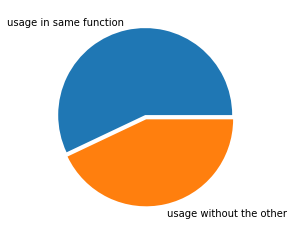

In [109]:
simultaneousCount = simultaneous_function_df['count'].sum()
totalCount = ast_df\
    .where((ast_df['match_type']=='unsafe.Pointer')|(ast_df['match_type']=='uintptr'))\
    .dropna()\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])\
    ['line_number'].count()

data = [simultaneousCount, totalCount - simultaneousCount]

plt.pie(data, labels=['usage in same function', 'usage without the other'], explode=(0, 0.05))
plt.show()

In [110]:
print("In der gleichen Funktion: {:,}".format(int(simultaneousCount)))
print("Alleinstehend: {:,}".format(totalCount - int(simultaneousCount)))
print("Insgesamt: {:,}".format(totalCount))

In der gleichen Funktion: 11,738
Alleinstehend: 8,841
Insgesamt: 20,579


## Statements, in denen unsafe.Pointer und uintptr verwendet wird

In [111]:
simultaneous_statement_df = statement_df\
    .where(statement_df['number_unsafe_pointer'] > 0)\
    .where(statement_df['number_uintptr'] > 0)\
    .dropna()\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

simultaneous_statement_df['count'] = simultaneous_statement_df.apply(
    lambda x: x['number_unsafe_pointer'] + x['number_uintptr'], axis=1)

simultaneous_statement_df

,line_number,column,text,number_unsafe_pointer,number_unsafe_sizeof,number_unsafe_alignof,number_unsafe_offsetof,number_uintptr,number_slice_header,number_string_header,file_name,package_import_path,module_path,module_version,project_name,count
17,56.0,2.0,\tsize := *(*uintptr)(unsafe.Pointer(ptr + uns...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,alg.go,runtime,std,std,kubernetes/kubernetes,2.0
24,51.0,2.0,\tsync_atomic_StoreUintptr((*uintptr)(unsafe.P...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,atomic_pointer.go,runtime,std,std,kubernetes/kubernetes,3.0
25,63.0,2.0,\told := unsafe.Pointer(sync_atomic_SwapUintpt...,2.0,0.0,0.0,0.0,2.0,0.0,0.0,atomic_pointer.go,runtime,std,std,kubernetes/kubernetes,4.0
26,76.0,2.0,\treturn sync_atomic_CompareAndSwapUintptr((*u...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,atomic_pointer.go,runtime,std,std,kubernetes/kubernetes,4.0
27,22.0,2.0,\tslot := (*uintptr)(unsafe.Pointer(ptr)),1.0,0.0,0.0,0.0,1.0,0.0,0.0,atomic_pointer.go,runtime,std,std,kubernetes/kubernetes,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096895,205.0,4.0,\t\t\thdr := &reflect.SliceHeader{\n\t\t\t\tDa...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,iterator_native2.go,gorgonia.org/tensor/native,gorgonia.org/tensor,v0.9.6,gorgonia/gorgonia,2.0
1096898,585.0,4.0,\t\t\thdr := &reflect.SliceHeader{\n\t\t\t\tDa...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,iterator_native2.go,gorgonia.org/tensor/native,gorgonia.org/tensor,v0.9.6,gorgonia/gorgonia,2.0
1132334,125.0,2.0,\treturn uintptr((*unsafeReflectValue)(unsafe....,1.0,0.0,0.0,0.0,1.0,0.0,0.0,helper_unsafe.go,github.com/ugorji/go/codec,github.com/ugorji/go,v0.0.0-20171122102828-84cb69a8af83,ledisdb/ledisdb,2.0
1132351,121.0,2.0,\treturn uintptr(((*unsafeIntf)(unsafe.Pointer...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,helper_unsafe.go,github.com/ugorji/go/codec,github.com/ugorji/go,v0.0.0-20171122102828-84cb69a8af83,ledisdb/ledisdb,2.0


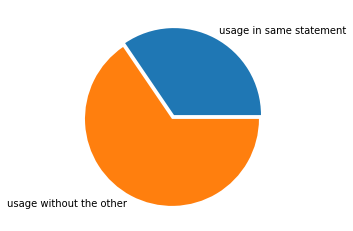

In [112]:
total_statement_df = statement_df\
    .dropna()\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])
total_statement_df['count'] = total_statement_df.apply(
    lambda x: x['number_unsafe_pointer'] + x['number_uintptr'], axis=1)

totalCount = total_statement_df['count'].sum()
simultaneousCount = simultaneous_statement_df['count'].sum()

data = [simultaneousCount, totalCount - simultaneousCount]

plt.pie(data, labels=['usage in same statement', 'usage without the other'], explode=(0, 0.05))
plt.show()

In [113]:
statements = simultaneous_statement_df['count'].count()

print("Im gleichen Statement: {:,} (verteilt auf {:,} Statements)".format(int(simultaneousCount), int(statements)))
print("Falls ein Statement unsafe enthält, enthält es im Schnitt {:.2} solcher Nutzungen."\
      .format(simultaneousCount / statements))
print("Alleinstehend: {:,}".format(totalCount - int(simultaneousCount)))
print("Insgesamt: {:,}".format(totalCount))

Im gleichen Statement: 7,246 (verteilt auf 2,123 Statements)
Falls ein Statement unsafe enthält, enthält es im Schnitt 3.4 solcher Nutzungen.
Alleinstehend: 13,757
Insgesamt: 21,003


Hinweis zur Interpretation: Es gibt also 8,466 unsafe.Pointer oder uintptr Nutzungen (zusammen). Oben bei der Auswertung von Vorkommnissen in der gleichen Datei steht:

Number of lines containing unsafe.Pointer in files where at least one other uintptr occurs: 6889

Nun könnte man sich denken: wie können 8466 Vorkommnisse im gleichen Statement sein, wenn nur 6889 überhaupt in der gleichen Datei auch nur ein anderes Vorkommen haben?

Die Antwort darauf ist: Viele Zeilen enthalten mehrere unsafe.Pointer oder mehrere uintptr Vorkommnisse. Diese werden bei der Dateianalyse dedupliziert, weil nach dem Subset Package/File/LineNumber Duplikate entfernt werden. Das ist nötig, weil ansonsten der Merge mit dem Datensatz selbst dafür sorgt, dass insgesamt mehr Usages zu existieren scheinen als es überhaupt gibt, denn jede Usage in der Zeile würde mit allen Usages in ebendieser Zeile gematcht werden.

Der Datensatz, den Grep erzeugt hat, erlaubt an dieser Stelle leider einfach keine genauere Auswertung.

## Abspeichern der Ergebnisse zur manuellen Klassifizierung

In [ ]:
#simultaneous_function_df.sample(n=200)\
#    .to_csv('/root/data/classification/interesting_snippets_same_function.csv')

In [ ]:
#simultaneous_statement_df.sample(n=200)\
#    .to_csv('/root/data/classification/interesting_snippets_same_statement.csv')

# Evaluation der Linter Implementierung

In [119]:
linter_df = pd.read_csv('/root/data/lexical/linter_findings_0_499.csv')

In [120]:
reflect_header_linter_df = linter_df\
    .where((linter_df['message']=="reflect header composite literal found")|\
           (linter_df['message']=="assigning to reflect header object"))\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number', 'module_path', 'module_version'])\
    .dropna()

In [121]:
reflect_header_linter_df['message'].count()

94

In [117]:
for pkg in reflect_header_linter_df['package_import_path'].unique():
    print(pkg)

print(len(reflect_header_linter_df['package_import_path'].unique()))

github.com/modern-go/reflect2
github.com/mailru/easyjson/jlexer
github.com/yuin/goldmark/util
go.etcd.io/bbolt
github.com/influxdata/influxdb/models
gopkg.in/redis.v5/internal
github.com/influxdata/influxdb1-client/models
github.com/hanwen/go-fuse/v2/fuse
github.com/philhofer/fwd
github.com/tinylib/msgp/msgp
github.com/RoaringBitmap/roaring
github.com/valyala/fasttemplate
github.com/cilium/ebpf
github.com/tidwall/gjson
github.com/buger/jsonparser
github.com/elastic/go-structform/internal/unsafe
github.com/valyala/fasthttp
github.com/hanwen/go-fuse/fuse
github.com/yuin/gopher-lua
github.com/tidwall/geojson/geometry
github.com/tidwall/sjson
github.com/tidwall/rhh
github.com/savsgio/gotils
github.com/gofiber/utils
github.com/go-ego/murmur
github.com/gogo/protobuf/proto
github.com/ugorji/go/codec
github.com/weaveworks/ps
github.com/pingcap/tidb/util/hack
github.com/segmentio/encoding/json
github.com/valyala/fastjson
gorgonia.org/tensor/internal/storage
32


In [118]:
sliceheader_df = pd.read_csv('/root/data/classification/interesting_snippets_sliceheader.csv')
vuln_df = sliceheader_df[sliceheader_df['label']=='vuln:create_sliceheader']\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number', 'module_path', 'module_version'])\
    .assign(label='unclassified')

FileNotFoundError: [Errno 2] File /root/data/classification/interesting_snippets_sliceheader.csv does not exist: '/root/data/classification/interesting_snippets_sliceheader.csv'

In [ ]:
vuln_df['text'].count()

In [ ]:
for pkg in vuln_df['package_import_path'].unique():
    print(pkg)
    
print(len(vuln_df['package_import_path'].unique()))

Welche fehlen?

In [ ]:
reflect_header_linter_df.columns

In [ ]:
columns_select_df1 = ['text', 'context', 'line_number', 'column', 'file_name', 'package_import_path', 
                      'module_path', 'module_version', 'project_name', 'label']
columns_select_df2 = ['context', 'line_number', 'column', 'file_name', 'package_import_path', 'module_path', 
                  'module_version', 'project_name']

df1 = vuln_df.loc[:,columns_select_df1]
df2 = reflect_header_linter_df.loc[:,columns_select_df2]

In [ ]:
covered_vulns_df = df1\
    .merge(df2, how="left", on=["line_number", "file_name", "package_import_path", 'module_path', 'module_version'])\
    .dropna()

for index, row in covered_vulns_df.iterrows():
    idx = vuln_df.index[(vuln_df['module_path']==row['module_path'])&\
                        (vuln_df['module_version']==row['module_version'])&\
                        (vuln_df['package_import_path']==row['package_import_path'])&\
                        (vuln_df['file_name']==row['file_name'])&(vuln_df['line_number']==row['line_number'])]\
                .tolist()[0]
    vuln_df.loc[idx,['label']] = 'found'

print("Tagged vulns that were found: {}".format(covered_vulns_df['line_number'].count()))

In [ ]:
mdf = df1\
    .merge(df2, how="outer", on=["line_number", "file_name", "package_import_path", 'module_path', 'module_version'])

missing_vulns_df = mdf[mdf['context_y'].isna()]
extra_vulns_df = mdf[mdf['context_x'].isna()]

print("Tagged vulns that were NOT found: {}".format(missing_vulns_df['line_number'].count()))
print("Vulns that the linter additionally found: {}".format(extra_vulns_df['line_number'].count()))

Analyse: warum wurde das erste Element nicht vom Linter erkannt?

In [ ]:
count = missing_vulns_df['line_number'].count()
print("Count: {}".format(count))

index = 76
print("Looking at index {}".format(index))
print("To go: {} ({} %)\n\n".format(count - 1 - index, (index+1)/count))

package_import_path = missing_vulns_df.iloc[index]['package_import_path']
file_name = missing_vulns_df.iloc[index]['file_name']
line_number = missing_vulns_df.iloc[index]['line_number']
project_name = missing_vulns_df.iloc[index]['project_name_x']
module_path = missing_vulns_df.iloc[index]['module_path']
module_version = missing_vulns_df.iloc[index]['module_version']

print(missing_vulns_df.iloc[index]['text'])
print("---")
print(missing_vulns_df.iloc[index]['context_x'])
print("---")
print(package_import_path)
print(file_name)
print(line_number)
print(project_name)
print(module_path)
print(module_version)

In [ ]:
reflect_header_linter_df\
    .where(reflect_header_linter_df['module_path']==module_path)\
    .where(reflect_header_linter_df['module_version']==module_version)\
    .where(reflect_header_linter_df['package_import_path']==package_import_path)\
    .where(reflect_header_linter_df['file_name']==file_name)\
    .where(reflect_header_linter_df['line_number']==line_number)\
    .dropna()

In [ ]:
vuln_df\
    .where(vuln_df['module_path']==module_path)\
    .where(vuln_df['module_version']==module_version)\
    .where(vuln_df['package_import_path']==package_import_path)\
    .where(vuln_df['file_name']==file_name)\
    .where(vuln_df['line_number']==line_number)\
    .dropna()

#vuln_df.loc[315,['label']]="linter-error-missing-composite-in-composite-works-now"

# Labels:
#
# composite-literal-in-other-line-found
# goerror-used-for-two-different-module-paths
# goerror-import-problems
# goerror-module-not-found-manual-lint-works
# aquisition-error-manual-lint-works
# linter-error-stack-overflow-manual-lint-works-now
# linter-error-missing-composite-in-composite-works-now

In [ ]:
#vuln_df.to_csv('/root/data/analysis/linter-sliceheader-missing-manual-findings.csv')

Was sind die zusätzlich gefundenen Zeilen?

In [ ]:
extra_vulns_df

Wie viele Findings gibt es insgesamt? Also multipliziert mit der Häufigkeit?

In [ ]:
linter_df\
    .where((linter_df['message']=="reflect header composite literal found")|\
           (linter_df['message']=="assigning to reflect header object"))\
    .dropna()

Einreichung der gefundenen Stellen als PR bei Github - eine nach der anderen!

In [136]:
reflect_header_linter_df['module_path'].count()

94

In [172]:
reflect_header_linter_df.sort_values(by='module_path')\
    .loc[:,['module_path','package_import_path','file_name','line_number', 'module_version', 'project_name']]\
    .iloc[60:120]

,module_path,package_import_path,file_name,line_number,module_version,project_name
643,github.com/tinylib/msgp,github.com/tinylib/msgp/msgp,unsafe.go,36.0,v1.1.2,go-gitea/gitea
642,github.com/tinylib/msgp,github.com/tinylib/msgp/msgp,unsafe.go,28.0,v1.1.2,go-gitea/gitea
8448,github.com/ugorji/go,github.com/ugorji/go/codec,helper_unsafe.go,59.0,v0.0.0-20170918222552-54210f4e076c,weaveworks/scope
9667,github.com/ugorji/go,github.com/ugorji/go/codec,helper_unsafe.go,53.0,v0.0.0-20171122102828-84cb69a8af83,ledisdb/ledisdb
9668,github.com/ugorji/go,github.com/ugorji/go/codec,helper_unsafe.go,63.0,v0.0.0-20171122102828-84cb69a8af83,ledisdb/ledisdb
8447,github.com/ugorji/go,github.com/ugorji/go/codec,helper_unsafe.go,49.0,v0.0.0-20170918222552-54210f4e076c,weaveworks/scope
6046,github.com/valyala/fasthttp,github.com/valyala/fasthttp,bytesconv.go,389.0,v1.2.0,kubernetes/ingress-nginx
8306,github.com/valyala/fasthttp,github.com/valyala/fasthttp,bytesconv.go,389.0,v1.3.0,dragonflyoss/Dragonfly
9316,github.com/valyala/fastjson,github.com/valyala/fastjson,util.go,17.0,v1.4.1,uber/cadence
9315,github.com/valyala/fastjson,github.com/valyala/fastjson,util.go,16.0,v1.4.1,uber/cadence


## Package popularity / import count for Fix PRs

In [174]:
package_df\
    .where(package_df['import_path'].str.startswith('github.com/mailru/easyjson'))\
    .dropna()\
    ['project_name'].nunique()

42

# Random sample of usages to classify into groups

In [225]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .where(grep_df['module_path']!='std').dropna()\
    .where(grep_df['module_path']!='golang.org/x/sys').dropna()\
    .groupby('project_name').count()\
    .sort_values(by='line_number')[-20:]

,text,context,line_number,column,absolute_offset,match_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,file_copy_path
project_name,,,,,,,,,,,,,
helm/helm,656,656,656,656,656,656,656,656,656,656,656,656,656
pingcap/tidb,668,668,668,668,668,668,668,668,668,668,668,668,668
minio/minio,686,686,686,686,686,686,686,686,686,686,686,686,686
derailed/k9s,688,688,688,688,688,688,688,688,688,688,688,688,688
mattermost/mattermost-server,690,690,690,690,690,690,690,690,690,690,690,690,690
weaveworks/scope,716,716,716,716,716,716,716,716,716,716,716,716,716
istio/istio,725,725,725,725,725,725,725,725,725,725,725,725,725
tsuru/tsuru,734,734,734,734,734,734,734,734,734,734,734,734,734
operator-framework/operator-sdk,744,744,744,744,744,744,744,744,744,744,744,744,744


**Projektauswahl:**

10 Projekte mit vielen Usages, die zumindest nicht alle etwas mit Containern zu tun haben.

 - kubernetes/kubernetes
 - mattermost/mattermost-server

 - rancher/rancher
 - weaveworks/scope
 - rook/rook
 - elastic/beats
 - hashicorp/terraform
 - cilium/cilium
 - grafana/loki
 - gorgonia/gorgonia

In [193]:
study_projects = ['kubernetes/kubernetes', 'mattermost/mattermost-server', 'rancher/rancher', 'weaveworks/scope',
                  'rook/rook', 'elastic/beats', 'hashicorp/terraform', 'cilium/cilium', 'grafana/loki',
                  'gorgonia/gorgonia']

In [220]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .where(grep_df['module_path']!='std').dropna()\
    .where(grep_df['module_path']!='golang.org/x/sys').dropna()\
    .where(grep_df['project_name']=='kubernetes/kubernetes').dropna()\
    .groupby('module_path').count()

,text,context,line_number,column,absolute_offset,match_type,file_name,file_loc,file_byte_size,package_import_path,module_version,project_name,file_copy_path
module_path,,,,,,,,,,,,,
github.com/cespare/xxhash/v2,4,4,4,4,4,4,4,4,4,4,4,4,4
github.com/cilium/ebpf,42,42,42,42,42,42,42,42,42,42,42,42,42
github.com/containerd/console,2,2,2,2,2,2,2,2,2,2,2,2,2
github.com/coreos/go-systemd,2,2,2,2,2,2,2,2,2,2,2,2,2
github.com/davecgh/go-spew,2,2,2,2,2,2,2,2,2,2,2,2,2
github.com/docker/docker,2,2,2,2,2,2,2,2,2,2,2,2,2
github.com/fsnotify/fsnotify,2,2,2,2,2,2,2,2,2,2,2,2,2
github.com/godbus/dbus,1,1,1,1,1,1,1,1,1,1,1,1,1
github.com/gogo/protobuf,35,35,35,35,35,35,35,35,35,35,35,35,35


In [242]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .where(grep_df['module_path']!='std').dropna()\
    .where(grep_df['module_path']!='golang.org/x/sys').dropna()\
    .where(grep_df['project_name'].isin(study_projects)).dropna()\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number']).dropna()\
    .groupby('project_name').count()

,text,context,line_number,column,absolute_offset,match_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,file_copy_path
project_name,,,,,,,,,,,,,
cilium/cilium,28,28,28,28,28,28,28,28,28,28,28,28,28
elastic/beats,347,347,347,347,347,347,347,347,347,347,347,347,347
gorgonia/gorgonia,242,242,242,242,242,242,242,242,242,242,242,242,242
grafana/loki,191,191,191,191,191,191,191,191,191,191,191,191,191
hashicorp/terraform,188,188,188,188,188,188,188,188,188,188,188,188,188
kubernetes/kubernetes,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100
mattermost/mattermost-server,170,170,170,170,170,170,170,170,170,170,170,170,170
rancher/rancher,683,683,683,683,683,683,683,683,683,683,683,683,683
rook/rook,432,432,432,432,432,432,432,432,432,432,432,432,432


In [241]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .where(grep_df['module_path']!='std').dropna()\
    .where(grep_df['module_path']!='golang.org/x/sys').dropna()\
    .where(grep_df['project_name'].isin(study_projects)).dropna()\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number']).dropna()\
    .sample(n=1000, random_state=1)\
    .groupby('project_name').count()

,text,context,line_number,column,absolute_offset,match_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,file_copy_path
project_name,,,,,,,,,,,,,
cilium/cilium,6,6,6,6,6,6,6,6,6,6,6,6,6
elastic/beats,91,91,91,91,91,91,91,91,91,91,91,91,91
gorgonia/gorgonia,60,60,60,60,60,60,60,60,60,60,60,60,60
grafana/loki,53,53,53,53,53,53,53,53,53,53,53,53,53
hashicorp/terraform,53,53,53,53,53,53,53,53,53,53,53,53,53
kubernetes/kubernetes,333,333,333,333,333,333,333,333,333,333,333,333,333
mattermost/mattermost-server,50,50,50,50,50,50,50,50,50,50,50,50,50
rancher/rancher,180,180,180,180,180,180,180,180,180,180,180,180,180
rook/rook,113,113,113,113,113,113,113,113,113,113,113,113,113


In [240]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .where(grep_df['module_path']!='std').dropna()\
    .where(grep_df['module_path']!='golang.org/x/sys').dropna()\
    .where(grep_df['project_name'].isin(study_projects)).dropna()\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number']).dropna()\
    .sample(n=1000, random_state=1)\
    .groupby('module_path').count()\
    .sort_values(by='line_number')

,text,context,line_number,column,absolute_offset,match_type,file_name,file_loc,file_byte_size,package_import_path,module_version,project_name,file_copy_path
module_path,,,,,,,,,,,,,
code.cloudfoundry.org/go-diodes,1,1,1,1,1,1,1,1,1,1,1,1,1
github.com/moby/term,1,1,1,1,1,1,1,1,1,1,1,1,1
github.com/philhofer/fwd,1,1,1,1,1,1,1,1,1,1,1,1,1
github.com/prometheus/prometheus,1,1,1,1,1,1,1,1,1,1,1,1,1
github.com/syndtr/gocapability,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
gorgonia.org/tensor,59,59,59,59,59,59,59,59,59,59,59,59,59
github.com/vishvananda/netlink,61,61,61,61,61,61,61,61,61,61,61,61,61
k8s.io/apiserver,64,64,64,64,64,64,64,64,64,64,64,64,64


In [237]:
sampled_usages_app = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .where(grep_df['module_path']!='std').dropna()\
    .where(grep_df['module_path']!='golang.org/x/sys').dropna()\
    .where(grep_df['project_name'].isin(study_projects)).dropna()\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number']).dropna()\
    .sample(n=1000, random_state=1)

#sampled_usages_app.to_csv('/root/data/classification/sampled_usages_app.csv', index=False)

In [238]:
sampled_usages_std = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .where((grep_df['module_path']=='std')|(grep_df['module_path']=='golang.org/x/sys')).dropna()\
    .where(grep_df['project_name'].isin(study_projects)).dropna()\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number']).dropna()\
    .sample(n=400, random_state=1)

#sampled_usages_std.to_csv('/root/data/classification/sampled_usages_std.csv', index=False)

**Mögliche Benutzungszwecke:**

 - Generics
 - Syscalls
 - In-Place Field Access & Cast (Effizienz)
 - Sauberer Code
 - Serialization & Deserialization
 - 

In [289]:
sampled_usages_std = pd.read_csv('/root/data/classification/sampled_usages_std.csv')
sampled_usages_app = pd.read_csv('/root/data/classification/sampled_usages_app.csv')

In [290]:
sampled_usages_std = sampled_usages_std\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number']).dropna()\
    .iloc[:, 2:]
sampled_usages_app = sampled_usages_app\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number']).dropna()\
    .iloc[:, 2:]

In [338]:
extra_std_base = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .where((grep_df['module_path']=='std')|(grep_df['module_path']=='golang.org/x/sys')).dropna()\
    .where(grep_df['project_name'].isin(study_projects)).dropna()\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number']).dropna()
extra_app_base = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .where(grep_df['module_path']!='std').dropna()\
    .where(grep_df['module_path']!='golang.org/x/sys').dropna()\
    .where(grep_df['project_name'].isin(study_projects)).dropna()\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number']).dropna()

In [339]:
extra_std = pd.concat([sampled_usages_std.reset_index().iloc[:, 1:-1], extra_std_base.reset_index().iloc[:, 1:]])\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number'], keep=False).dropna()\
    .sample(n=28, random_state=1)
extra_app = pd.concat([sampled_usages_app.reset_index().iloc[:, 1:-1], extra_app_base.reset_index().iloc[:, 1:]])\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number'], keep=False).dropna()\
    .sample(n=101, random_state=1)

extra_std['label'] = 'unclassified'
extra_app['label'] = 'unclassified'

In [340]:
sampled_usages_std_fixed = pd.concat([sampled_usages_std, extra_std])\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number']).dropna()
sampled_usages_app_fixed = pd.concat([sampled_usages_app, extra_app])\
    .drop_duplicates(subset=['module_path', 'package_import_path', 'file_name', 'line_number']).dropna()

In [349]:
#sampled_usages_std_fixed.to_csv('/root/data/classification/sampled_usages_std.csv', index=False)
#sampled_usages_app_fixed.to_csv('/root/data/classification/sampled_usages_app.csv', index=False)

## Scratch Space

In [ ]:
"It's dangerous to Go alone. Take *this!"